<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Proyecto_Final_Analitica_2_Eq2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Acerca del Set de Datos

Estos datos son de una empresa llamada Scholastic Travel Company (STC) la cual es una agencia de turismo educacional especializada en viajes estudiantiles y culturales. 
Los viajes que realizan son de historia y ciencia para alumnos de secundaria y preparatoria, viajes de intercambio para
alumnos de universidad, viajes destino artísticos,etc.

Pretendemos establecer una estrategia de Marketing basada en un modelo de predicción que nos diga 
si los clientes del año pasado volverán a contratar sus servicios.
Esto lo determina la variable "Retained.in.2012." la cual es nuestra variable predictoria.

## Importamos Datos

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

import warnings 
warnings.filterwarnings("ignore")

In [300]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/STC(A).csv")

In [301]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [302]:
pd.set_option("display.max_columns", None)
df.head()

ID Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
0   1           HS         4.0       4.0          CA               0     1   
1   2           HC         8.0       8.0          AZ               0     7   
2   3           HD         8.0       8.0          FL               0     3   
3   4           HN         9.0      12.0          VA               1     3   
4   5           HD         6.0       8.0          FL               0     6   

  Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  Tuition  \
0           A           40557        40557         40420         NaN      424   
1           A           40557        40564         40132          CP     2350   
2           A           40558        40560         40466         NaN     1181   
3           B           40558        40560         40550         NaN      376   
4           T           40559        40564         40451         NaN      865   

   FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  Latest.RPL  \
0          25              3                 0.424    40266.0     40402.0   
1           9              9                 0.409    40106.0     40400.0   
2          17              6                 0.708    40297.0     40406.0   
3           0              0                 0.000        NaN         NaN   
4          40              8                 0.494    40266.0     40402.0   

   Cancelled.Pax  Total.Discount.Pax  Initial.System.Date Poverty.Code  \
0              3                   4              40263.0            B   
1             11                   3              40088.0            C   
2              6                   3              40206.0            C   
3              1                   0              40470.0          NaN   
4              9                   8              40260.0            D   

                Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
0  Southern California          4.0      PUBLIC                    1   
1                Other         10.0      PUBLIC                    1   
2                Other         10.0      PUBLIC                    1   
3                Other          7.0         CHD                    0   
4                Other         10.0      PUBLIC                    1   

  MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
0             K             5.0                    927.0            Q   
1             7             8.0                    850.0            A   
2             6             8.0                    955.0            O   
3           NaN             NaN                      NaN          NaN   
4             6             8.0                    720.0            C   

   EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  FPP  \
0                0.170               1       CA History         EXISTING   59   
1                0.091               0       East Coast         EXISTING   22   
2                0.042               0       East Coast         EXISTING   24   
3                0.000               0       East Coast         EXISTING   18   
4                0.383               0       East Coast         EXISTING   81   

   Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  FirstMeeting  \
0         63                424                            1       40402.0   
1         25               2350                            2       40134.0   
2         27               1181                            1       40434.0   
3         18                376                            0           NaN   
4         89                865                            1       40414.0   

   LastMeeting  DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
0      40402.0                           155.0                          155.0   
1      40417.0                           423.0                          140.0   
2      40434.0                           124.0                      

## Indexamos en base a ID al igual que el modelo de retención del ejemplo

In [303]:
df.set_index('ID',inplace=True)

In [304]:
pd.set_option("display.max_columns", None)
df.head()

Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
ID                                                                        
1            HS         4.0       4.0          CA               0     1   
2            HC         8.0       8.0          AZ               0     7   
3            HD         8.0       8.0          FL               0     3   
4            HN         9.0      12.0          VA               1     3   
5            HD         6.0       8.0          FL               0     6   

   Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  \
ID                                                                      
1            A           40557        40557         40420         NaN   
2            A           40557        40564         40132          CP   
3            A           40558        40560         40466         NaN   
4            B           40558        40560         40550         NaN   
5            T           40559        40564         40451         NaN   

    Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
ID                                                                        
1       424          25              3                 0.424    40266.0   
2      2350           9              9                 0.409    40106.0   
3      1181          17              6                 0.708    40297.0   
4       376           0              0                 0.000        NaN   
5       865          40              8                 0.494    40266.0   

    Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
ID                                                                       
1      40402.0              3                   4              40263.0   
2      40400.0             11                   3              40088.0   
3      40406.0              6                   3              40206.0   
4          NaN              1                   0              40470.0   
5      40402.0              9                   8              40260.0   

   Poverty.Code               Region  CRM.Segment School.Type  \
ID                                                              
1             B  Southern California          4.0      PUBLIC   
2             C                Other         10.0      PUBLIC   
3             C                Other         10.0      PUBLIC   
4           NaN                Other          7.0         CHD   
5             D                Other         10.0      PUBLIC   

    Parent.Meeting.Flag MDR.Low.Grade  MDR.High.Grade  \
ID                                                      
1                     1             K             5.0   
2                     1             7             8.0   
3                     1             6             8.0   
4                     0           NaN             NaN   
5                     1             6             8.0   

    Total.School.Enrollment Income.Level  EZ.Pay.Take.Up.Rate  School.Sponsor  \
ID                                                                              
1                     927.0            Q                0.170               1   
2                     850.0            A                0.091               0   
3                     955.0            O                0.042               0   
4                       NaN          NaN                0.000               0   
5                     720.0            C                0.383               0   

   SPR.Product.Type SPR.New.Existing  FPP  Total.Pax  SPR.Group.Revenue  \
ID                                                                        
1        CA History         EXISTING   59         63                424   
2        East Coast         EXISTING   22         25               2350   
3        East Coast         EXISTING   24         27               1181   
4        East Coast         EXISTING   18         18                376   
5        East Coast         EXISTING   81     

In [305]:
df.info

<bound method DataFrame.info of      Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
ID                                                                          
1              HS         4.0       4.0          CA               0     1   
2              HC         8.0       8.0          AZ               0     7   
3              HD         8.0       8.0          FL               0     3   
4              HN         9.0      12.0          VA               1     3   
5              HD         6.0       8.0          FL               0     6   
...           ...         ...       ...         ...             ...   ...   
2385           HC         7.0       8.0          CA               0     5   
2386           HD         8.0       8.0          CA               0     5   
2387           HD        10.0      12.0          CA               0     6   
2388           HS         4.0       4.0          CA               0     1   
2389           HD         8.0       8.0     

# Limpieza de datos

## Intentamos Borrar Renglones sin datos

In [306]:
#Notamos que no hay renglones que no tengan ningún dato por lo que la Data Frame se mantiene igual
df.dropna(how='all').count()['Retained.in.2012.'] 

2389

## Buscamos datos faltantes

In [307]:
df.isnull().sum().sort_values(ascending=False)

Special.Pay                       1919
Early.RPL                          673
Poverty.Code                       599
FirstMeeting                       337
LastMeeting                        337
DifferenceTraveltoFirstMeeting     337
DifferenceTraveltoLastMeeting      337
To.Grade                           150
From.Grade                         127
Total.School.Enrollment             91
SchoolSizeIndicator                 91
FPP.to.School.enrollment            91
MDR.High.Grade                      68
MDR.Low.Grade                       68
Income.Level                        62
Latest.RPL                          19
Initial.System.Date                  8
CRM.Segment                          4
FPP                                  0
MajorProgramCode                     0
SPR.Group.Revenue                    0
NumberOfMeetingswithParents          0
Num.of.Non_FPP.PAX                   0
FPP.to.PAX                           0
SingleGradeTripFlag                  0
GroupGradeTypeHigh       

La variable que más datos perdidos presenta es Special.Pay, la cual indica si hubo un método especial de pago (El maestro recibiendo los pagos directamente, por ejemplo). En caso de que no hubiera un tipo de pago especial, se omite el dato. Esto quiere decir, que los 1919 datos faltantes representan la cantidad de veces que se pagó con el método estándar, el cual es, que la agencia reciba el pago directamente.

Con esto en mente, podemos sustituir esos valores faltantes por el valor "STC" para señalar las ocasiones en las que STC recibió el pago de manera directa.

In [308]:
df["Special.Pay"].unique() #Identificamos valores de Special.Pay

array([nan, 'CP', 'FR', 'SA'], dtype=object)

In [309]:
df["Special.Pay"].fillna("STC", inplace=True) #Sustituimos los valores faltantes por STC

In [310]:
df["Special.Pay"].unique()

array(['STC', 'CP', 'FR', 'SA'], dtype=object)

In [311]:
df.isnull().sum().sort_values(ascending=False)

Early.RPL                         673
Poverty.Code                      599
FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
DifferenceTraveltoLastMeeting     337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Latest.RPL                         19
Initial.System.Date                 8
CRM.Segment                         4
SchoolGradeTypeHigh                 0
MajorProgramCode                    0
SPR.Group.Revenue                   0
NumberOfMeetingswithParents         0
Num.of.Non_FPP.PAX                  0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
GroupGradeTypeHigh                  0
GroupGradeType                      0
FPP         

La siguiente variable con mayor cantidad de valores faltantes es Early.RPL, la cual nos indica la fecha en la cual se envió la primer comunicación sobre el viaje (normalmente entre 12 y 18 meses antes del viaje). Inversamente, la variable Latest.RPL nos indica la fecha en la que se envió la última comunicación (normalmente 6 a 9 meses antes del viaje). Lo interesante es que Early.RPL tiene 673 datos faltantes cuando la variable Latest.RPL tiene solo 19.

Entonces teorizamos que la columna de Early.RPL no fue usada en los casos en los que solo hubo un envío de comunicación avisando al grupo del próximo viaje.

Algo que pudiera apoyar esta hipótesis es validar si hay casos en los que se haya registro en la variable Early.RPL y no lo haya en Latest.RPL

In [312]:
#Validamos si hay registros con datos en Early.RPL y Nulls en Latest.RPL
condicion = df['Early.RPL'].notnull() & df['Latest.RPL'].isnull()
registros_faltantes = df[condicion]

# Imprimir los registros que cumplen con la condición
print(registros_faltantes)

Empty DataFrame
Columns: [Program.Code, From.Grade, To.Grade, Group.State, Is.Non.Annual., Days, Travel.Type, Departure.Date, Return.Date, Deposit.Date, Special.Pay, Tuition, FRP.Active, FRP.Cancelled, FRP.Take.up.percent., Early.RPL, Latest.RPL, Cancelled.Pax, Total.Discount.Pax, Initial.System.Date, Poverty.Code, Region, CRM.Segment, School.Type, Parent.Meeting.Flag, MDR.Low.Grade, MDR.High.Grade, Total.School.Enrollment, Income.Level, EZ.Pay.Take.Up.Rate, School.Sponsor, SPR.Product.Type, SPR.New.Existing, FPP, Total.Pax, SPR.Group.Revenue, NumberOfMeetingswithParents, FirstMeeting, LastMeeting, DifferenceTraveltoFirstMeeting, DifferenceTraveltoLastMeeting, SchoolGradeTypeLow, SchoolGradeTypeHigh, SchoolGradeType, DepartureMonth, GroupGradeTypeLow, GroupGradeTypeHigh, GroupGradeType, MajorProgramCode, SingleGradeTripFlag, FPP.to.School.enrollment, FPP.to.PAX, Num.of.Non_FPP.PAX, SchoolSizeIndicator, Retained.in.2012.]
Index: []


Dado a que no hay registros que cumplan con la condición (datos en Early.RPL y nulls en Latest.RPL) podemos suponer que nuestra teoría es cierta (En los casos en que solo hubo una comunicación avisando del viaje, solamente se usó la columna de Latest.RPL para registrarla).
Por este motivo podemos eliminar la mayor parte de los nulls en Early.RPL copiando los datos que haya en Latest.RPL (si hay solo un aviso, este aviso funge tanto como el primero y el último).

In [313]:
#sustituimos valores de Latest.RPL en Early.RPL para los casos en que Early.RPL son Nulls
df['Early.RPL'].fillna(df['Latest.RPL'], inplace=True)

In [314]:
df[['Early.RPL','Latest.RPL']]

Early.RPL  Latest.RPL
ID                         
1       40266.0     40402.0
2       40106.0     40400.0
3       40297.0     40406.0
4           NaN         NaN
5       40266.0     40402.0
...         ...         ...
2385    40486.0     40486.0
2386    40294.0     40428.0
2387    40520.0     40520.0
2388    40428.0     40428.0
2389    40436.0     40436.0

[2389 rows x 2 columns]

In [315]:
df.isnull().sum().sort_values(ascending=False)

Poverty.Code                      599
FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
DifferenceTraveltoLastMeeting     337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Early.RPL                          19
Latest.RPL                         19
Initial.System.Date                 8
CRM.Segment                         4
SchoolGradeTypeHigh                 0
MajorProgramCode                    0
SPR.Group.Revenue                   0
NumberOfMeetingswithParents         0
Num.of.Non_FPP.PAX                  0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
GroupGradeTypeHigh                  0
GroupGradeType                      0
FPP         

La siguiente variable con mayor cantidad de nulls es Poverty.Code, la cual indica en qué porcentaje por debajo de la línea de pobreza se encuentra la zona en la cual está la escuela de origen (y se supone que, por ende, los padres que estarán pagando por el viaje).

Analizamos los posibles valores que contiene esta variable

In [316]:
df["Poverty.Code"].unique()

array(['B', 'C', nan, 'D', 'A', 'E', '0'], dtype=object)

In [317]:
df[["Poverty.Code"]]

Poverty.Code
ID               
1               B
2               C
3               C
4             NaN
5               D
...           ...
2385            C
2386            C
2387          NaN
2388          NaN
2389            B

[2389 rows x 1 columns]

Detectamos el valor "0" el cual no está dentro de los valores posibles (A a la E) por lo que procederemos a borrarlo

In [318]:
#Borramos los valores "0" de la columna "Poverty.Code"
df['Poverty.Code'].replace('0', np.nan, inplace=True)
df["Poverty.Code"].unique()

array(['B', 'C', nan, 'D', 'A', 'E'], dtype=object)

Transformamos datos no nulls para después poder imputar los nulls con KNN

In [319]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
mask = df['Poverty.Code'].notnull()
df.loc[mask, 'Poverty.Code'] = label_encoder.fit_transform(df.loc[mask, 'Poverty.Code'])

In [320]:
#Validamos las nuevas etiquetas
df["Poverty.Code"].unique()

array([1, 2, nan, 3, 0, 4], dtype=object)

In [321]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["Poverty.Code"]])
df["Poverty.Code"] = imputer.transform(df[["Poverty.Code"]]).ravel()

print("Valores perdidos en Poverty.Code: " + 
      str(df['Poverty.Code'].isnull().sum()))

Valores perdidos en Poverty.Code: 0


In [322]:
df[["Poverty.Code"]]

Poverty.Code
ID                
1         1.000000
2         2.000000
3         2.000000
4         1.204367
5         3.000000
...            ...
2385      2.000000
2386      2.000000
2387      1.204367
2388      1.204367
2389      1.000000

[2389 rows x 1 columns]

In [323]:
df["Poverty.Code"].unique()

array([1.       , 2.       , 1.2043673, 3.       , 0.       , 4.       ])

In [324]:
df[["Poverty.Code"]]

Poverty.Code
ID                
1         1.000000
2         2.000000
3         2.000000
4         1.204367
5         3.000000
...            ...
2385      2.000000
2386      2.000000
2387      1.204367
2388      1.204367
2389      1.000000

[2389 rows x 1 columns]

In [325]:
df.isnull().sum().sort_values(ascending=False)

FirstMeeting                      337
LastMeeting                       337
DifferenceTraveltoFirstMeeting    337
DifferenceTraveltoLastMeeting     337
To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Early.RPL                          19
Latest.RPL                         19
Initial.System.Date                 8
CRM.Segment                         4
SchoolGradeTypeHigh                 0
NumberOfMeetingswithParents         0
Total.Pax                           0
SPR.Group.Revenue                   0
Num.of.Non_FPP.PAX                  0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
MajorProgramCode                    0
GroupGradeType                      0
SchoolGradeType                     0
GroupGradeTy

In [326]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]]

FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
ID                                                                
1          40402.0      40402.0                           155.0   
2          40134.0      40417.0                           423.0   
3          40434.0      40434.0                           124.0   
4              NaN          NaN                             NaN   
5          40414.0      40414.0                           145.0   
...            ...          ...                             ...   
2385           NaN          NaN                             NaN   
2386       40304.0      40458.0                           419.0   
2387           NaN          NaN                             NaN   
2388       40437.0      40437.0                           287.0   
2389       40451.0      40451.0                           273.0   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
ID                                                                
1                             155.0                            1  
2                             140.0                            2  
3                             124.0                            1  
4                               NaN                            0  
5                             145.0                            1  
...                             ...                          ...  
2385                            NaN                            0  
2386                          265.0                            2  
2387                            NaN                            0  
2388                          287.0                            1  
2389                          273.0                            1  

[2389 rows x 5 columns]

Las siguientes variables tienen la misma cantidad de valores faltantes debido a que son secuenciales,
es decir, si no ocurre la primer variable, el resto tampoco pueden ocurrir. En este caso se trata de fechas de juntas de seguimiento con los padres de los alumnos y cuántos días antes de la fecha del viaje ocurrieron estas juntas.
FirstMeeting, LastMeeting, DifferenceTraveltoFirstMeeting, DifferenceTraveltoLastMeeting

Esto es comprobable con la variable "NumberOfMeetingswithParents" la cual debe ser igual a 0 en estos casos.

Estos datos faltantes los imputaremos usando KNN

In [327]:
imputer.fit(df[["FirstMeeting"]])
df["FirstMeeting"] = imputer.transform(df[["FirstMeeting"]]).ravel()
imputer.fit(df[["LastMeeting"]])
df["LastMeeting"] = imputer.transform(df[["LastMeeting"]]).ravel()
imputer.fit(df[["DifferenceTraveltoFirstMeeting"]])
df["DifferenceTraveltoFirstMeeting"] = imputer.transform(df[["DifferenceTraveltoFirstMeeting"]]).ravel()
imputer.fit(df[["DifferenceTraveltoLastMeeting"]])
df["DifferenceTraveltoLastMeeting"] = imputer.transform(df[["DifferenceTraveltoLastMeeting"]]).ravel()


In [328]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]]

FirstMeeting   LastMeeting  DifferenceTraveltoFirstMeeting  \
ID                                                                 
1     40402.000000  40402.000000                      155.000000   
2     40134.000000  40417.000000                      423.000000   
3     40434.000000  40434.000000                      124.000000   
4     40408.495614  40441.601365                      262.083821   
5     40414.000000  40414.000000                      145.000000   
...            ...           ...                             ...   
2385  40408.495614  40441.601365                      262.083821   
2386  40304.000000  40458.000000                      419.000000   
2387  40408.495614  40441.601365                      262.083821   
2388  40437.000000  40437.000000                      287.000000   
2389  40451.000000  40451.000000                      273.000000   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
ID                                                                
1                         155.00000                            1  
2                         140.00000                            2  
3                         124.00000                            1  
4                         228.97807                            0  
5                         145.00000                            1  
...                             ...                          ...  
2385                      228.97807                            0  
2386                      265.00000                            2  
2387                      228.97807                            0  
2388                      287.00000                            1  
2389                      273.00000                            1  

[2389 rows x 5 columns]

Convertimos las columnas a int para eliminar decimales pues posteriormente convertiremos aquellas columnas correspondientes a formato fecha

In [329]:
df[["FirstMeeting","LastMeeting","DifferenceTraveltoFirstMeeting","DifferenceTraveltoLastMeeting","NumberOfMeetingswithParents"]].astype(int)

FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
ID                                                                
1            40402        40402                             155   
2            40134        40417                             423   
3            40434        40434                             124   
4            40408        40441                             262   
5            40414        40414                             145   
...            ...          ...                             ...   
2385         40408        40441                             262   
2386         40304        40458                             419   
2387         40408        40441                             262   
2388         40437        40437                             287   
2389         40451        40451                             273   

      DifferenceTraveltoLastMeeting  NumberOfMeetingswithParents  
ID                                                                
1                               155                            1  
2                               140                            2  
3                               124                            1  
4                               228                            0  
5                               145                            1  
...                             ...                          ...  
2385                            228                            0  
2386                            265                            2  
2387                            228                            0  
2388                            287                            1  
2389                            273                            1  

[2389 rows x 5 columns]

In [330]:
df.isnull().sum().sort_values(ascending=False)

To.Grade                          150
From.Grade                        127
Total.School.Enrollment            91
SchoolSizeIndicator                91
FPP.to.School.enrollment           91
MDR.High.Grade                     68
MDR.Low.Grade                      68
Income.Level                       62
Early.RPL                          19
Latest.RPL                         19
Initial.System.Date                 8
CRM.Segment                         4
GroupGradeTypeHigh                  0
Total.Pax                           0
SPR.Group.Revenue                   0
Num.of.Non_FPP.PAX                  0
FPP.to.PAX                          0
SingleGradeTripFlag                 0
MajorProgramCode                    0
NumberOfMeetingswithParents         0
FirstMeeting                        0
LastMeeting                         0
GroupGradeTypeLow                   0
DifferenceTraveltoFirstMeeting      0
DifferenceTraveltoLastMeeting       0
SchoolGradeTypeLow                  0
SPR.New.Exis

Las variables To.Grade y From.Grade indican el mayor y menor grado escolar de los participantes de un programa (Tipo de viaje, ej, viaje de historia a Nueva York) específico (indicado por la variable Program.Code)

Estos datos faltantes también los imputaremos usando KNN

In [331]:
imputer.fit(df[["To.Grade"]])
df["To.Grade"] = imputer.transform(df[["To.Grade"]]).ravel()
imputer.fit(df[["From.Grade"]])
df["From.Grade"] = imputer.transform(df[["From.Grade"]]).ravel()

In [332]:
df[["From.Grade","To.Grade"]]

From.Grade  To.Grade
ID                        
1            4.0       4.0
2            8.0       8.0
3            8.0       8.0
4            9.0      12.0
5            6.0       8.0
...          ...       ...
2385         7.0       8.0
2386         8.0       8.0
2387        10.0      12.0
2388         4.0       4.0
2389         8.0       8.0

[2389 rows x 2 columns]

In [333]:
df["From.Grade"].unique()

array([ 4.       ,  8.       ,  9.       ,  6.       , 10.       ,
       11.       ,  5.       ,  7.       ,  7.2683466, 12.       ,
        3.       ])

In [334]:
df["To.Grade"].unique()

array([ 4.        ,  8.        , 12.        ,  9.        ,  5.        ,
        7.        ,  7.91290755,  6.        , 10.        , 11.        ,
        3.        ])

In [335]:
# Redondear los valores en la columna "From.Grade" & "To.Grade" esto lo podemos realizar después para ver si aumenta nuestro % de accuracy al final
#df["From.Grade"] = df["From.Grade"].round()
#df["To.Grade"] = df["To.Grade"].round()

In [336]:
df["From.Grade"].unique()

array([ 4.       ,  8.       ,  9.       ,  6.       , 10.       ,
       11.       ,  5.       ,  7.       ,  7.2683466, 12.       ,
        3.       ])

In [337]:
df["To.Grade"].unique()

array([ 4.        ,  8.        , 12.        ,  9.        ,  5.        ,
        7.        ,  7.91290755,  6.        , 10.        , 11.        ,
        3.        ])

In [338]:
df.isnull().sum().sort_values(ascending=False)

Total.School.Enrollment           91
SchoolSizeIndicator               91
FPP.to.School.enrollment          91
MDR.High.Grade                    68
MDR.Low.Grade                     68
Income.Level                      62
Latest.RPL                        19
Early.RPL                         19
Initial.System.Date                8
CRM.Segment                        4
LastMeeting                        0
FPP                                0
Num.of.Non_FPP.PAX                 0
Total.Pax                          0
FPP.to.PAX                         0
SingleGradeTripFlag                0
SPR.Group.Revenue                  0
NumberOfMeetingswithParents        0
FirstMeeting                       0
GroupGradeType                     0
GroupGradeTypeHigh                 0
DifferenceTraveltoFirstMeeting     0
DifferenceTraveltoLastMeeting      0
MajorProgramCode                   0
SPR.Product.Type                   0
SchoolGradeTypeLow                 0
SchoolGradeTypeHigh                0
S

Total.School.Enrollment Indica la cantidad de alumnos inscritos en la escuela
SchoolSizeIndicator es una categoría de tamaño de la escuela (Pequeña, Mediana, Grande, Etc)
FPP.to.School.enrollment Indica la proporción de alumnos que pagan algún viaje de entre todos los alumnos inscritos en la escuela

Estos datos los imputaremos usando KNN

In [339]:
#Validamos tipos de datos
df["Total.School.Enrollment"].unique()

array([ 927.,  850.,  955.,   nan,  720.,  939.,  225.,  500.,  635.,
        746.,  650.,  670.,  750.,  753.,  626.,  467.,  360.,  345.,
        664., 1693.,  760.,  641.,  700., 1300.,  685.,  702.,  698.,
        604.,  597.,  320.,  794.,  966.,  321., 2393.,  783.,  430.,
        562.,  522.,  364.,  351., 1306., 1008.,  652.,  240.,  880.,
        565., 1325.,  412.,  824.,  230., 1023., 1688.,  200., 1555.,
        400.,  280., 1232.,  478.,  669.,  495.,  586.,  900.,  835.,
        996.,  497.,  310.,  550.,  610.,  864.,  365.,  511.,  372.,
        375.,  682., 2159., 1100.,  428.,  552.,  688.,  330.,  315.,
        468.,  957., 1102.,  780.,  570.,  350., 1140., 1165.,  452.,
       1590.,  184.,  165., 1450.,  995.,  923., 1249.,  547., 1266.,
        675.,  919.,  875.,  638., 1318.,  743.,  220.,  429.,  509.,
        717., 1514.,  239.,  947., 1077.,  625.,  449.,  740., 1305.,
       1032.,  767., 1360.,  487.,  475.,  772.,  789., 1792.,  895.,
        172.,  642.,

In [340]:
df["SchoolSizeIndicator"].unique()

array(['L', nan, 'M-L', 'S', 'S-M'], dtype=object)

In [341]:
df["FPP.to.School.enrollment"].unique()

array([0.06364617, 0.02588235, 0.02513089, ..., 0.00736842, 0.01898048,
       0.03478261])

In [342]:
#Aplicamos etiquetas a la única variable categorica SchoolSizeIndicator en valores no null
mask = df['SchoolSizeIndicator'].notnull()
df.loc[mask, 'SchoolSizeIndicator'] = label_encoder.fit_transform(df.loc[mask, 'SchoolSizeIndicator'])
df["SchoolSizeIndicator"].unique()

array([0, nan, 1, 2, 3], dtype=object)

Imputamos valores null con KNN

In [343]:
imputer.fit(df[["Total.School.Enrollment"]])
df["Total.School.Enrollment"] = imputer.transform(df[["Total.School.Enrollment"]]).ravel()
imputer.fit(df[["SchoolSizeIndicator"]])
df["SchoolSizeIndicator"] = imputer.transform(df[["SchoolSizeIndicator"]]).ravel()
imputer.fit(df[["FPP.to.School.enrollment"]])
df["FPP.to.School.enrollment"] = imputer.transform(df[["FPP.to.School.enrollment"]]).ravel()

In [344]:
df["Total.School.Enrollment"].unique()

array([ 927.        ,  850.        ,  955.        ,  648.35857267,
        720.        ,  939.        ,  225.        ,  500.        ,
        635.        ,  746.        ,  650.        ,  670.        ,
        750.        ,  753.        ,  626.        ,  467.        ,
        360.        ,  345.        ,  664.        , 1693.        ,
        760.        ,  641.        ,  700.        , 1300.        ,
        685.        ,  702.        ,  698.        ,  604.        ,
        597.        ,  320.        ,  794.        ,  966.        ,
        321.        , 2393.        ,  783.        ,  430.        ,
        562.        ,  522.        ,  364.        ,  351.        ,
       1306.        , 1008.        ,  652.        ,  240.        ,
        880.        ,  565.        , 1325.        ,  412.        ,
        824.        ,  230.        , 1023.        , 1688.        ,
        200.        , 1555.        ,  400.        ,  280.        ,
       1232.        ,  478.        ,  669.        ,  495.     

In [345]:
df["SchoolSizeIndicator"].unique()

array([0.        , 1.48302872, 1.        , 2.        , 3.        ])

In [346]:
df["FPP.to.School.enrollment"].unique()

array([0.06364617, 0.02588235, 0.02513089, ..., 0.00736842, 0.01898048,
       0.03478261])

In [347]:
df.isnull().sum().sort_values(ascending=False)

MDR.High.Grade                    68
MDR.Low.Grade                     68
Income.Level                      62
Early.RPL                         19
Latest.RPL                        19
Initial.System.Date                8
CRM.Segment                        4
FPP                                0
Total.Pax                          0
SPR.Group.Revenue                  0
NumberOfMeetingswithParents        0
FirstMeeting                       0
LastMeeting                        0
DifferenceTraveltoFirstMeeting     0
DifferenceTraveltoLastMeeting      0
Program.Code                       0
SPR.Product.Type                   0
SchoolGradeTypeLow                 0
SchoolGradeTypeHigh                0
SchoolGradeType                    0
DepartureMonth                     0
GroupGradeTypeLow                  0
GroupGradeTypeHigh                 0
GroupGradeType                     0
MajorProgramCode                   0
SingleGradeTripFlag                0
FPP.to.School.enrollment           0
F

Validamos cuántos registros perderíamos si borramos todos los Nulls

In [348]:
print('2389 registros originales vs ',df.dropna().count()['Retained.in.2012.'], 'registros si quitamos todos los Null' )

2389 registros originales vs  2301 registros si quitamos todos los Null


Despues de esta limpieza nos quedarían aún el 96.63% de los registros originales por lo que podemos trabajar con esta cantidad de datos para desarrollar el modelo de predicción

In [349]:
#Eliminamos filas que contienen valores nulos a lo largo de todas las variables
df.dropna(inplace=True)

In [350]:
df.isnull().sum().sort_values(ascending=False)

Program.Code                      0
SchoolGradeTypeLow                0
School.Sponsor                    0
SPR.Product.Type                  0
SPR.New.Existing                  0
FPP                               0
Total.Pax                         0
SPR.Group.Revenue                 0
NumberOfMeetingswithParents       0
FirstMeeting                      0
LastMeeting                       0
DifferenceTraveltoFirstMeeting    0
DifferenceTraveltoLastMeeting     0
SchoolGradeTypeHigh               0
Income.Level                      0
SchoolGradeType                   0
DepartureMonth                    0
GroupGradeTypeLow                 0
GroupGradeTypeHigh                0
GroupGradeType                    0
MajorProgramCode                  0
SingleGradeTripFlag               0
FPP.to.School.enrollment          0
FPP.to.PAX                        0
Num.of.Non_FPP.PAX                0
SchoolSizeIndicator               0
EZ.Pay.Take.Up.Rate               0
Total.School.Enrollment     

## Análisis Exploratorio de los Datos

In [351]:
df.head(10)

Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
ID                                                                        
1            HS         4.0       4.0          CA               0     1   
2            HC         8.0       8.0          AZ               0     7   
3            HD         8.0       8.0          FL               0     3   
5            HD         6.0       8.0          FL               0     6   
6            HC        10.0      12.0          LA               0     4   
7            SG        11.0      12.0          MA               1     6   
9            CC         8.0       8.0          AZ               0     8   
10           HD         8.0       8.0          TX               0     4   
11           CD         8.0       8.0          FL               0     4   
12           HD         8.0       8.0          FL               0     4   

   Travel.Type  Departure.Date  Return.Date  Deposit.Date Special.Pay  \
ID                                                                      
1            A           40557        40557         40420         STC   
2            A           40557        40564         40132          CP   
3            A           40558        40560         40466         STC   
5            T           40559        40564         40451         STC   
6            A           40560        40563         40451         STC   
7            A           40561        40566         40466         STC   
9            A           40572        40579         40330          CP   
10           A           40581        40584         40476         STC   
11           A           40581        40584         40451         STC   
12           A           40581        40584         40466         STC   

    Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
ID                                                                        
1       424          25              3                 0.424    40266.0   
2      2350           9              9                 0.409    40106.0   
3      1181          17              6                 0.708    40297.0   
5       865          40              8                 0.494    40266.0   
6      2025           9              4                 0.900    40253.0   
7      1977          16              4                 0.640    40234.0   
9      2200          30              0                 0.577    40221.0   
10     1428          51              1                 0.773    40269.0   
11      999          47              1                 0.566    40423.0   
12     1388          32              0                 0.800    40220.0   

    Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
ID                                                                       
1      40402.0              3                   4              40263.0   
2      40400.0             11                   3              40088.0   
3      40406.0              6                   3              40206.0   
5      40402.0              9                   8              40260.0   
6      40457.0              3                   1              40253.0   
7      40422.0              5                   2              40234.0   
9      40221.0              0                   4              40220.0   
10     40401.0              1                   6              40268.0   
11     40423.0              1                   4              40268.0   
12     40410.0              0                   5              40220.0   

    Poverty.Code               Region  CRM.Segment            School.Type  \
ID                                                                          
1       1.000000  Southern California          4.0                 PUBLIC   
2       2.000000                Other         10.0                 PUBLIC   
3       2.000000                Other         10.0                 PUBLIC   
5       3.000000                Other         10.0

Aplicamos formato a las variables de fecha

In [352]:
df["Departure.Date"] = df["Departure.Date"].round()
df["Return.Date"] = df["Return.Date"].round()
df["Deposit.Date"] = df["Deposit.Date"].round()
df["Early.RPL"] = df["Early.RPL"].round()
df["Latest.RPL"] = df["Latest.RPL"].round()
df["Initial.System.Date"] = df["Initial.System.Date"].round()
df["FirstMeeting"] = df["FirstMeeting"].round()
df["LastMeeting"] = df["LastMeeting"].round()

In [353]:
import datetime

In [354]:
df['Departure.Date'] = pd.to_datetime(df['Departure.Date'], origin='1899-12-30', unit='D')
df['Return.Date'] = pd.to_datetime(df['Return.Date'], origin='1899-12-30', unit='D')
df['Deposit.Date'] = pd.to_datetime(df['Deposit.Date'], origin='1899-12-30', unit='D')
df['Early.RPL'] = pd.to_datetime(df['Early.RPL'], origin='1899-12-30', unit='D')
df['Latest.RPL'] = pd.to_datetime(df['Latest.RPL'], origin='1899-12-30', unit='D')
df['Initial.System.Date'] = pd.to_datetime(df['Initial.System.Date'], origin='1899-12-30', unit='D')
df['FirstMeeting'] = pd.to_datetime(df['FirstMeeting'], origin='1899-12-30', unit='D')
df['LastMeeting'] = pd.to_datetime(df['LastMeeting'], origin='1899-12-30', unit='D')

In [355]:
df.head(2)

Program.Code  From.Grade  To.Grade Group.State  Is.Non.Annual.  Days  \
ID                                                                        
1            HS         4.0       4.0          CA               0     1   
2            HC         8.0       8.0          AZ               0     7   

   Travel.Type Departure.Date Return.Date Deposit.Date Special.Pay  Tuition  \
ID                                                                            
1            A     2011-01-14  2011-01-14   2010-08-30         STC      424   
2            A     2011-01-14  2011-01-21   2009-11-15          CP     2350   

    FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
ID                                                                          
1           25              3                 0.424 2010-03-29 2010-08-12   
2            9              9                 0.409 2009-10-20 2010-08-10   

    Cancelled.Pax  Total.Discount.Pax Initial.System.Date  Poverty.Code  \
ID                                                                        
1               3                   4          2010-03-26           1.0   
2              11                   3          2009-10-02           2.0   

                 Region  CRM.Segment School.Type  Parent.Meeting.Flag  \
ID                                                                      
1   Southern California          4.0      PUBLIC                    1   
2                 Other         10.0      PUBLIC                    1   

   MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment Income.Level  \
ID                                                                       
1              K             5.0                    927.0            Q   
2              7             8.0                    850.0            A   

    EZ.Pay.Take.Up.Rate  School.Sponsor SPR.Product.Type SPR.New.Existing  \
ID                                                                          
1                 0.170               1       CA History         EXISTING   
2                 0.091               0       East Coast         EXISTING   

    FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                                   
1    59         63                424                            1   
2    22         25               2350                            2   

   FirstMeeting LastMeeting  DifferenceTraveltoFirstMeeting  \
ID                                                            
1    2010-08-12  2010-08-12                           155.0   
2    2009-11-17  2010-08-27                           423.0   

    DifferenceTraveltoLastMeeting SchoolGradeTypeLow SchoolGradeTypeHigh  \
ID                                                                         
1                           155.0         Elementary          Elementary   
2                           140.0             Middle              Middle   

           SchoolGradeType DepartureMonth GroupGradeTypeLow  \
ID                                                            
1   Elementary->Elementary        January                 K   
2           Middle->Middle        January            Middle   

   GroupGradeTypeHigh  GroupGradeType MajorProgramCode  SingleGradeTripFlag  \
ID                                                                            
1          Elementary   K->Elementary                H                    1   
2              Middle  Middle->Middle                H                    1   

    FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
ID                                                             
1                   0.063646    0.936508                   4   
2                   0.025882    0.880000                   3   

    SchoolSizeIndicator  Retained.in.2012.  
ID                                          
1                   0.0                  1  
2                   0.0                  1

In [356]:
df["Retained.in.2012."].unique()

array([1, 0])

In [357]:
print(df.dtypes)

Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                             int64
Days                                       int64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                    int64
FRP.Active                                 int64
FRP.Cancelled                              int64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                              int64
Total.Discount.Pax                         int64
Initial.System.Date               datetime64[ns]
Poverty.Code        

In [358]:
#Seleccionamos datos categoricos 
df_categoricos = df[["Program.Code","Group.State","Travel.Type","Special.Pay","Region","School.Type","MDR.Low.Grade","Income.Level","SPR.Product.Type",
                     "SPR.New.Existing","SchoolGradeTypeLow","SchoolGradeTypeHigh","SchoolGradeType","DepartureMonth","GroupGradeTypeLow",
                     "GroupGradeTypeHigh","GroupGradeType","MajorProgramCode","Retained.in.2012."]]
df_categoricos.head()

Program.Code Group.State Travel.Type Special.Pay               Region  \
ID                                                                         
1            HS          CA           A         STC  Southern California   
2            HC          AZ           A          CP                Other   
3            HD          FL           A         STC                Other   
5            HD          FL           T         STC                Other   
6            HC          LA           A         STC                Other   

   School.Type MDR.Low.Grade Income.Level SPR.Product.Type SPR.New.Existing  \
ID                                                                            
1       PUBLIC             K            Q       CA History         EXISTING   
2       PUBLIC             7            A       East Coast         EXISTING   
3       PUBLIC             6            O       East Coast         EXISTING   
5       PUBLIC             6            C       East Coast         EXISTING   
6       PUBLIC            10            I       East Coast              NEW   

   SchoolGradeTypeLow SchoolGradeTypeHigh         SchoolGradeType  \
ID                                                                  
1          Elementary          Elementary  Elementary->Elementary   
2              Middle              Middle          Middle->Middle   
3              Middle              Middle          Middle->Middle   
5              Middle              Middle          Middle->Middle   
6                High                High              High->High   

   DepartureMonth GroupGradeTypeLow GroupGradeTypeHigh  GroupGradeType  \
ID                                                                       
1         January                 K         Elementary   K->Elementary   
2         January            Middle             Middle  Middle->Middle   
3         January            Middle             Middle  Middle->Middle   
5         January            Middle             Middle  Middle->Middle   
6         January              High               High      High->High   

   MajorProgramCode  Retained.in.2012.  
ID                                      
1                 H                  1  
2                 H                  1  
3                 H                  1  
5                 H                  0  
6                 H                  1

In [359]:
df_numericos = df[['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',
                   'Departure.Date', 'Return.Date', 'Deposit.Date', 'Early.RPL', 'Latest.RPL', 'Initial.System.Date',
                   'FirstMeeting', 'LastMeeting']]
df_numericos.head()

From.Grade  To.Grade  Is.Non.Annual.  Days  Tuition  FRP.Active  \
ID                                                                    
1          4.0       4.0               0     1      424          25   
2          8.0       8.0               0     7     2350           9   
3          8.0       8.0               0     3     1181          17   
5          6.0       8.0               0     6      865          40   
6         10.0      12.0               0     4     2025           9   

    FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  Total.Discount.Pax  \
ID                                                                           
1               3                 0.424              3                   4   
2               9                 0.409             11                   3   
3               6                 0.708              6                   3   
5               8                 0.494              9                   8   
6               4                 0.900              3                   1   

    Poverty.Code  CRM.Segment  Parent.Meeting.Flag  MDR.High.Grade  \
ID                                                                   
1            1.0          4.0                    1             5.0   
2            2.0         10.0                    1             8.0   
3            2.0         10.0                    1             8.0   
5            3.0         10.0                    1             8.0   
6            2.0          8.0                    1            12.0   

    Total.School.Enrollment  EZ.Pay.Take.Up.Rate  School.Sponsor  FPP  \
ID                                                                      
1                     927.0                0.170               1   59   
2                     850.0                0.091               0   22   
3                     955.0                0.042               0   24   
5                     720.0                0.383               0   81   
6                     939.0                0.100               0   10   

    Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                              
1          63                424                            1   
2          25               2350                            2   
3          27               1181                            1   
5          89                865                            1   
6          11               2025                            1   

    DifferenceTraveltoFirstMeeting  DifferenceTraveltoLastMeeting  \
ID                                                                  
1                            155.0                          155.0   
2                            423.0                          140.0   
3                            124.0                          124.0   
5                            145.0                          145.0   
6                             91.0                           91.0   

    FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
ID                                                             
1                   0.063646    0.936508                   4   
2                   0.025882    0.880000                   3   
3                   0.025131    0.888889                   3   
5                   0.112500    0.910112                   8   
6                   0.010650    0.909091                   1   

    SchoolSizeIndicator  Retained.in.2012. Departure.Date Return.Date  \
ID                                                                      
1                   0.0                  1     2011-01-14  2011-01-14   
2                   0.0                  1     2011-01-14  2011-01-21   
3                   0.0                  1     2011-01-15  2011-01-17   
5                   1.0                  0     2011-01-16  2011-01-21   
6                   0.0                  1     2011-01-17  2011-01-20   

   Deposit.Date  Early.RPL Latest.RPL Initial.System.Da

In [360]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
# Establecer estilo de seaborn
sns.set(style="ticks")

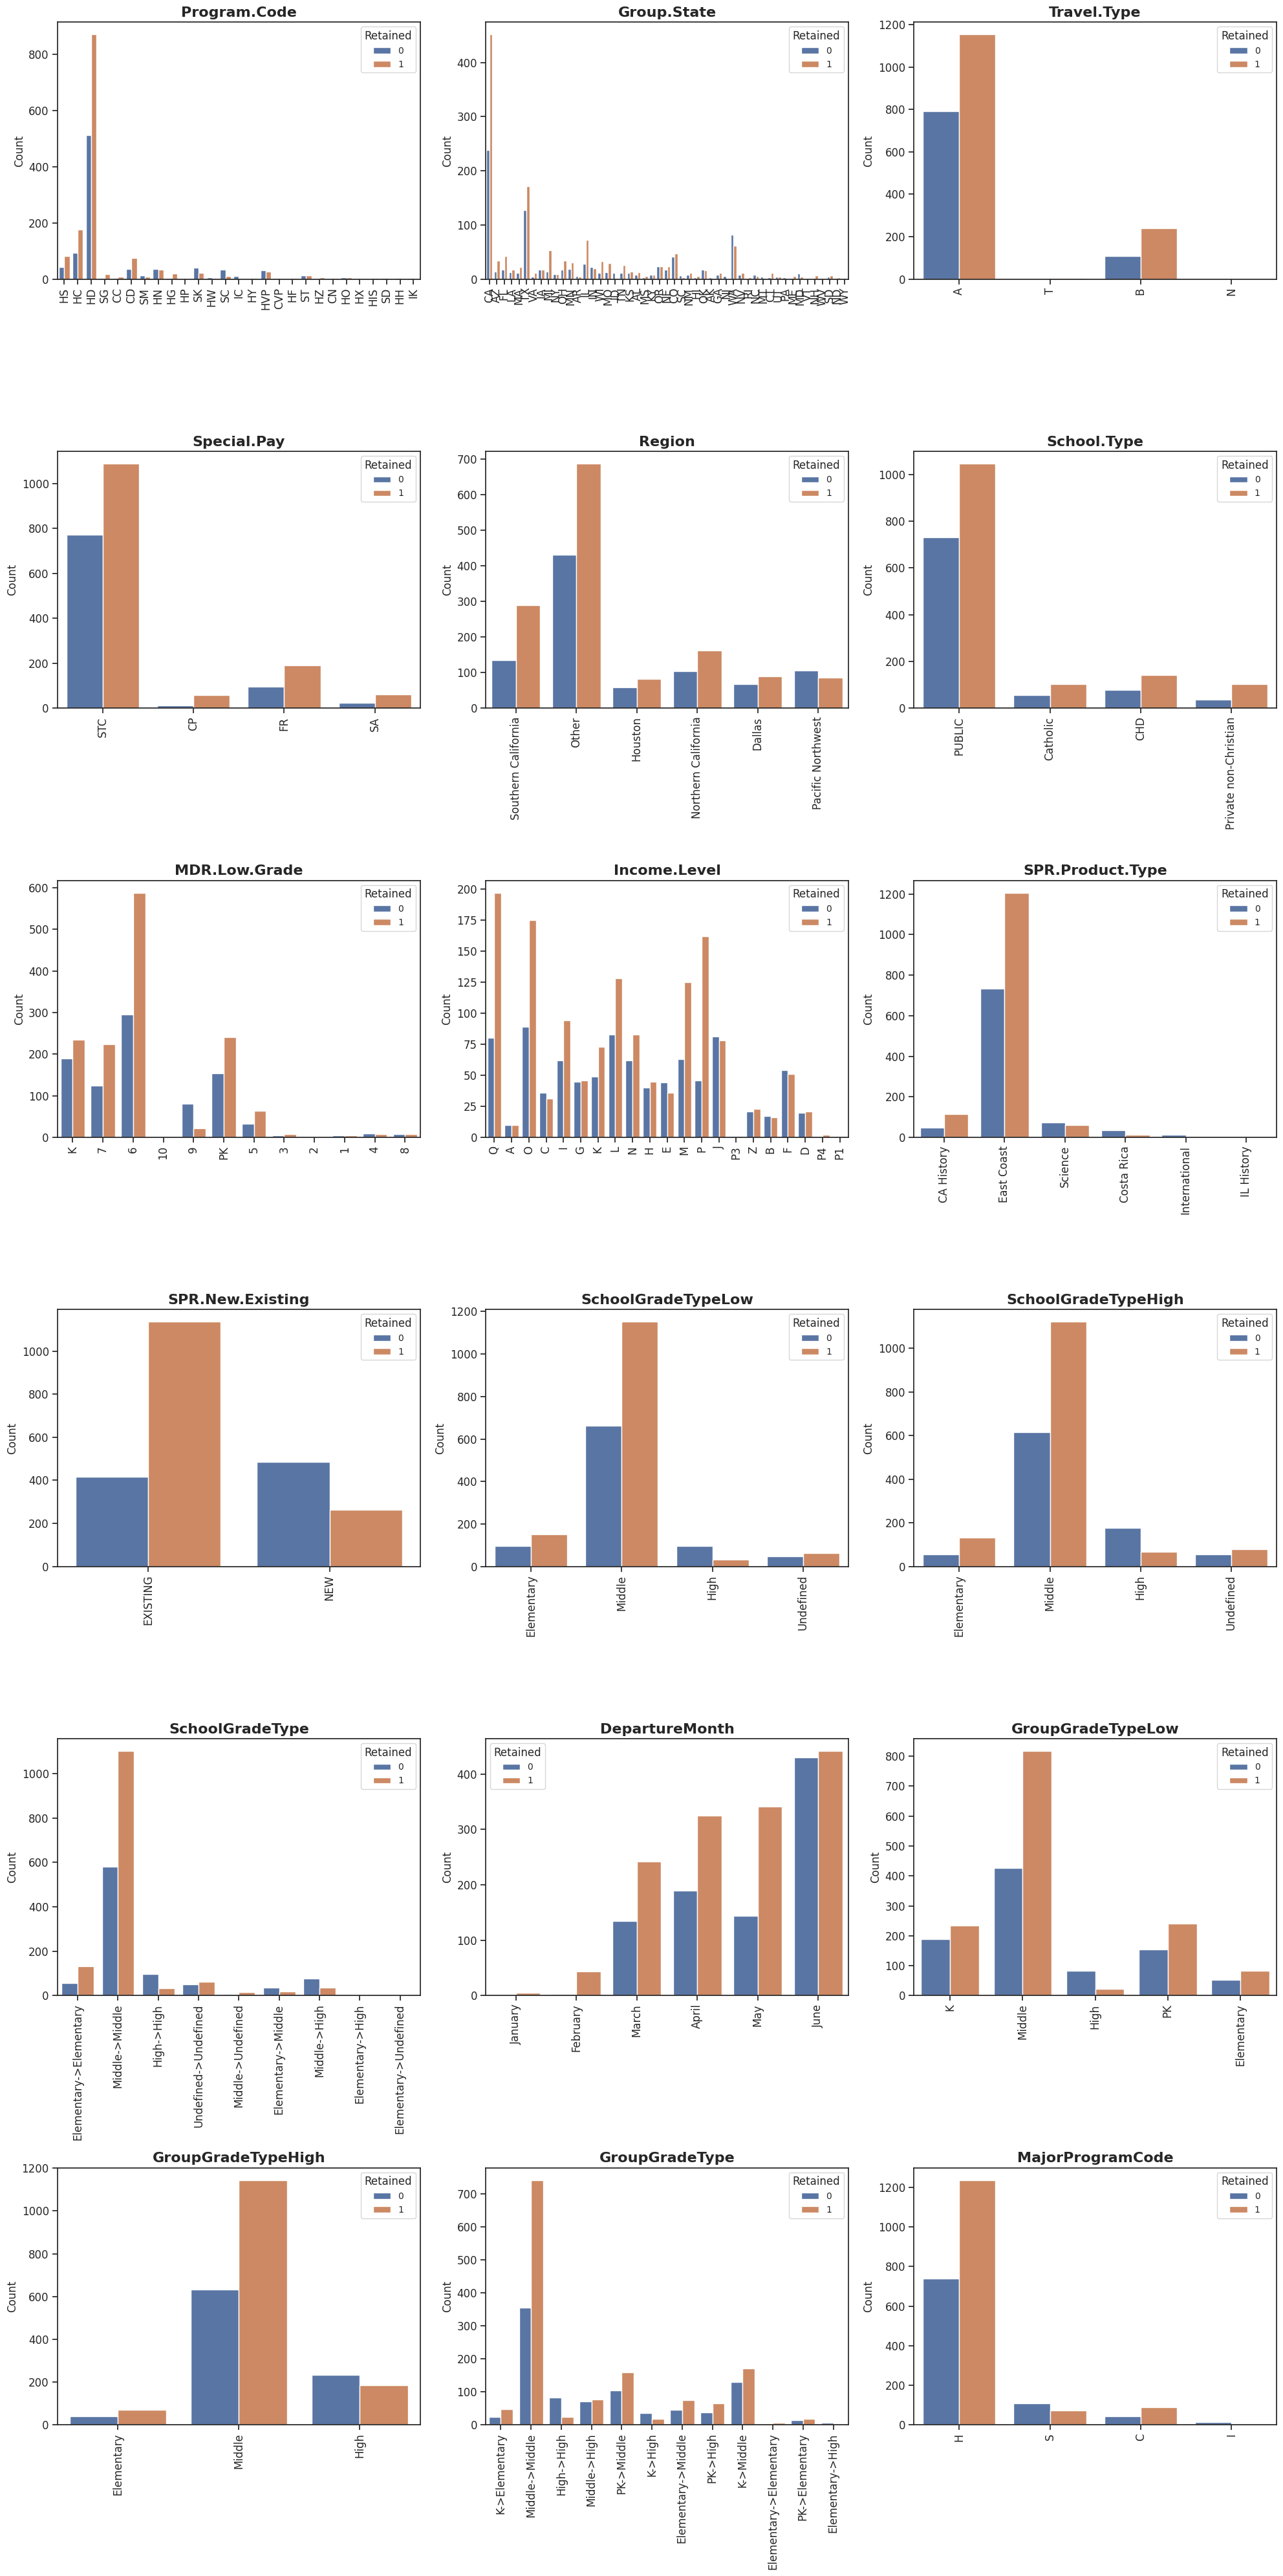

In [362]:
cat_vars = ["Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade",
            "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh",
            "SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType",
            "MajorProgramCode"]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize = (20, 40))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue="Retained.in.2012.", data=df_categoricos, ax=axs[i])
    axs[i].set_title(var, fontdict={'fontsize': 16, 'fontweight': 'bold'})
    axs[i].tick_params(axis='both', labelsize=12)
    axs[i].legend(title="Retained", title_fontsize=12, fontsize=10)
    axs[i].set_ylabel("Count", fontsize=12)
    axs[i].set_xlabel("")  # Eliminar el nombre del eje x
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

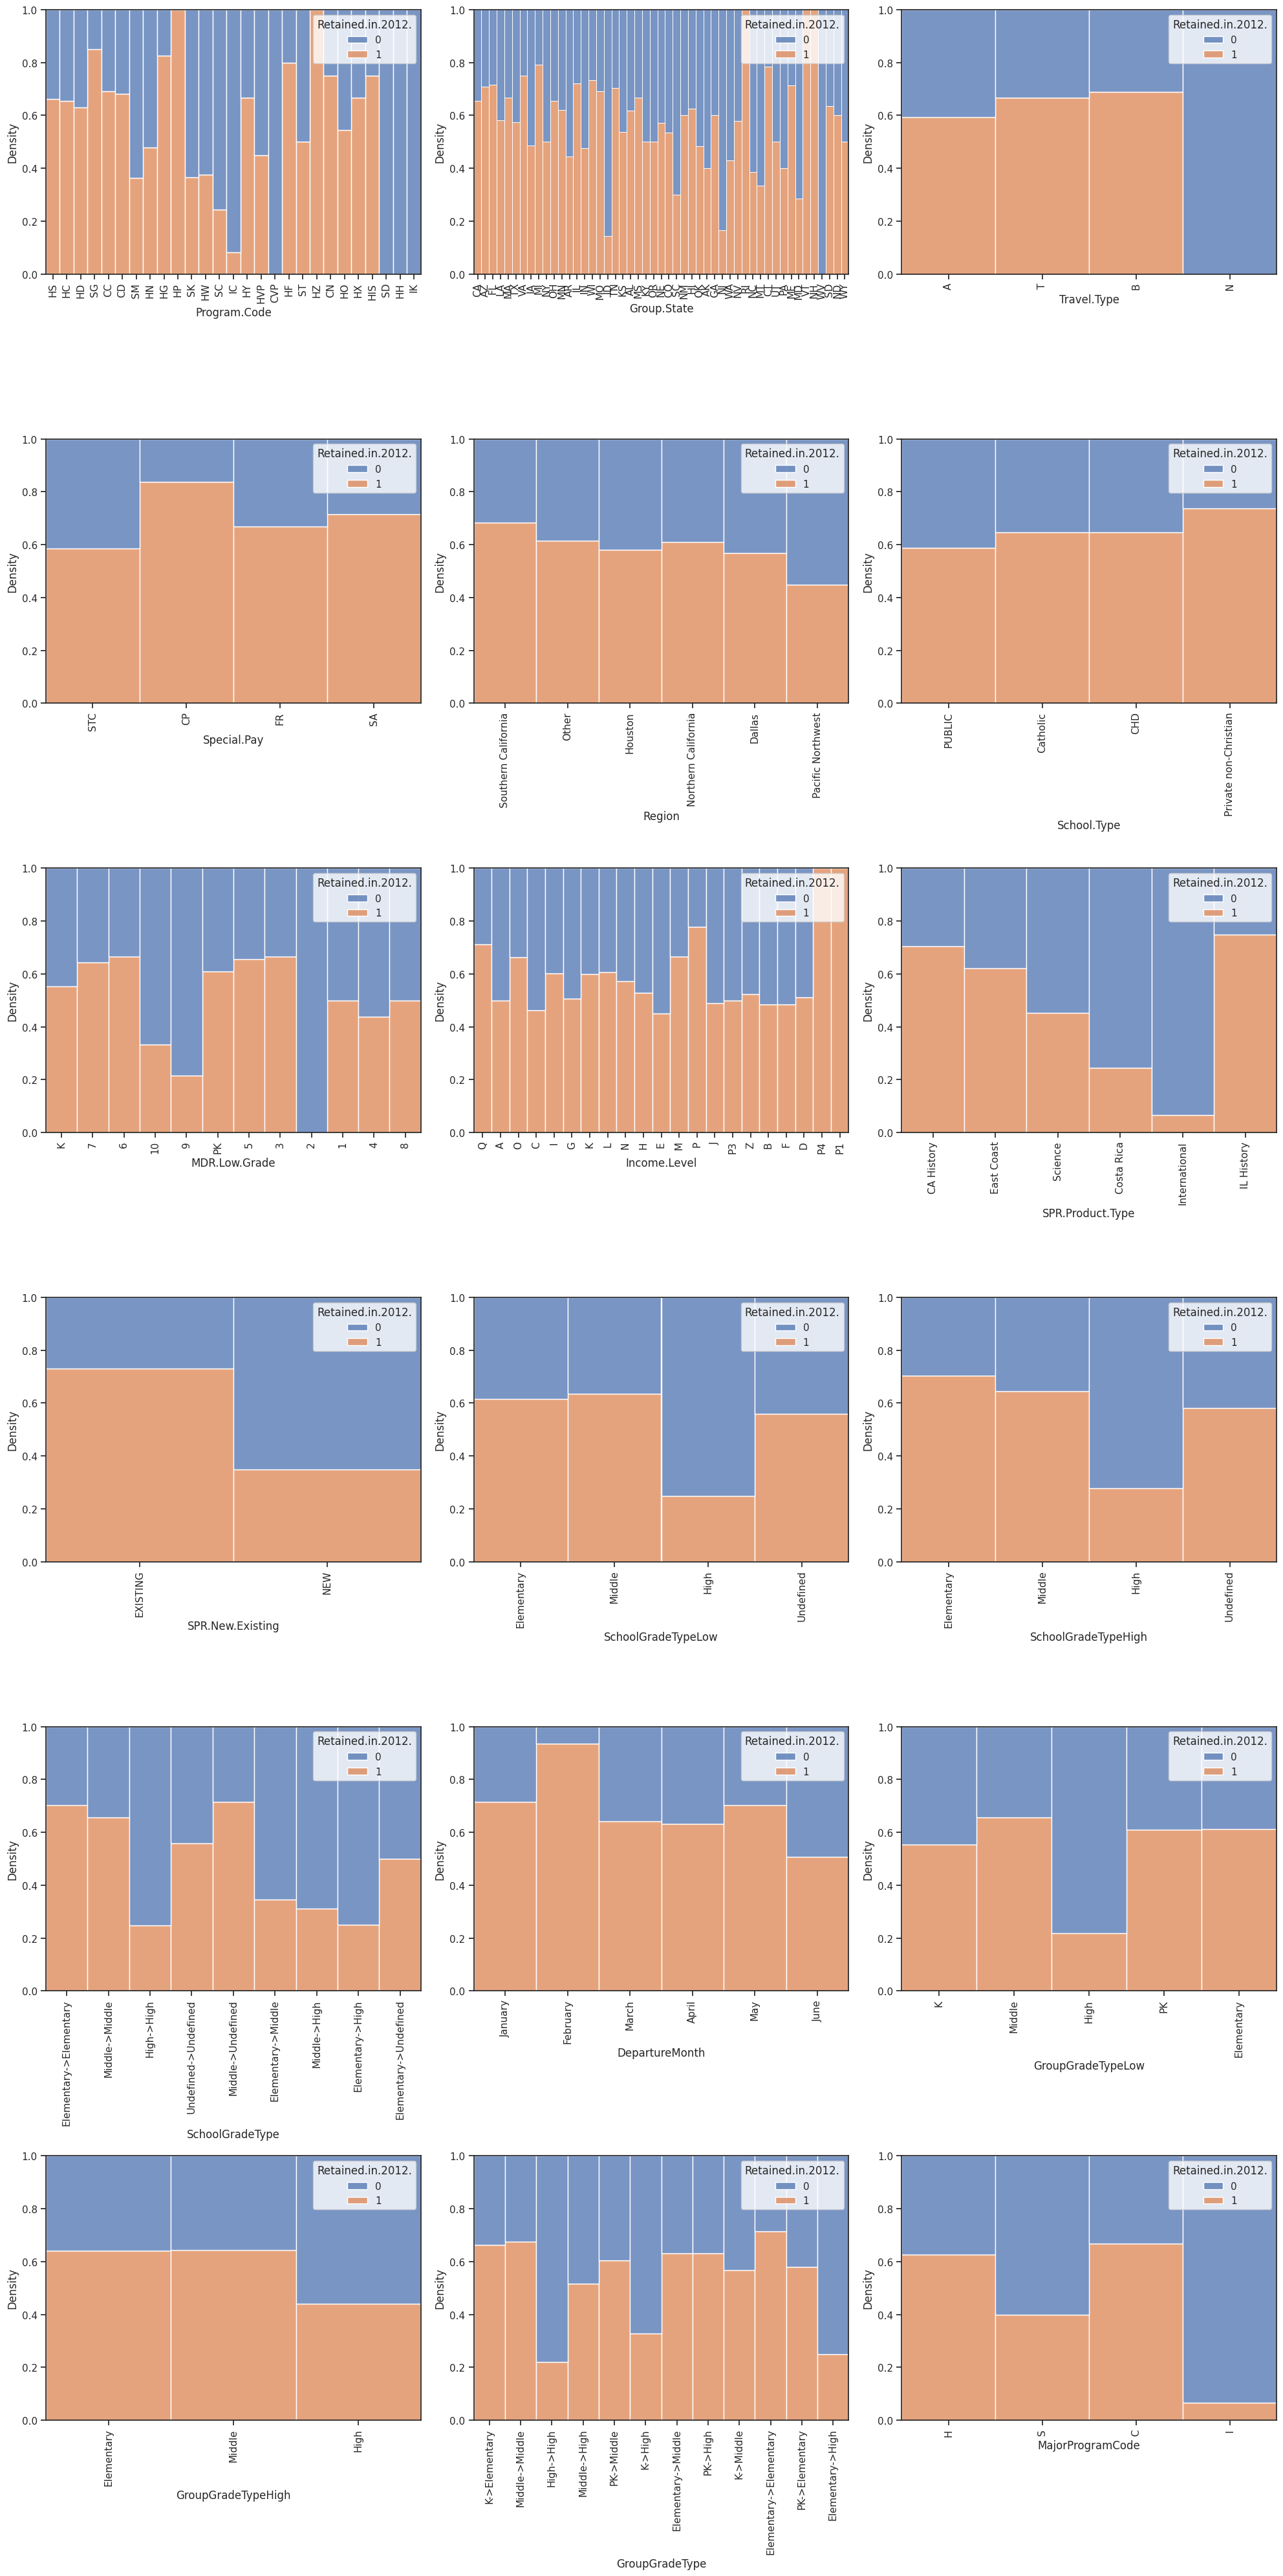

In [363]:
#Lista  de variables categoricas 
cat_vars = ["Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade",
            "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh",
            "SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType",
            "MajorProgramCode"]

#Crear figuras con subplots
fig, axs = plt.subplots(nrows=6, ncols=3, figsize = (20, 40))
axs = axs.flatten()

#Crear histogramas para cada variable categorica 
for i, var in enumerate (cat_vars):
    sns.histplot(x=var, hue="Retained.in.2012.", data = df_categoricos, ax=axs[i], multiple = "fill", kde = False, element = "bars", fill= True, stat = "density")
    axs[i].set_xticklabels(df_categoricos[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
    
#Ajustar el especio entre subplots
fig.tight_layout()

#Mostrar el plot
plt.show()

Gráficas para entender variables numéricas


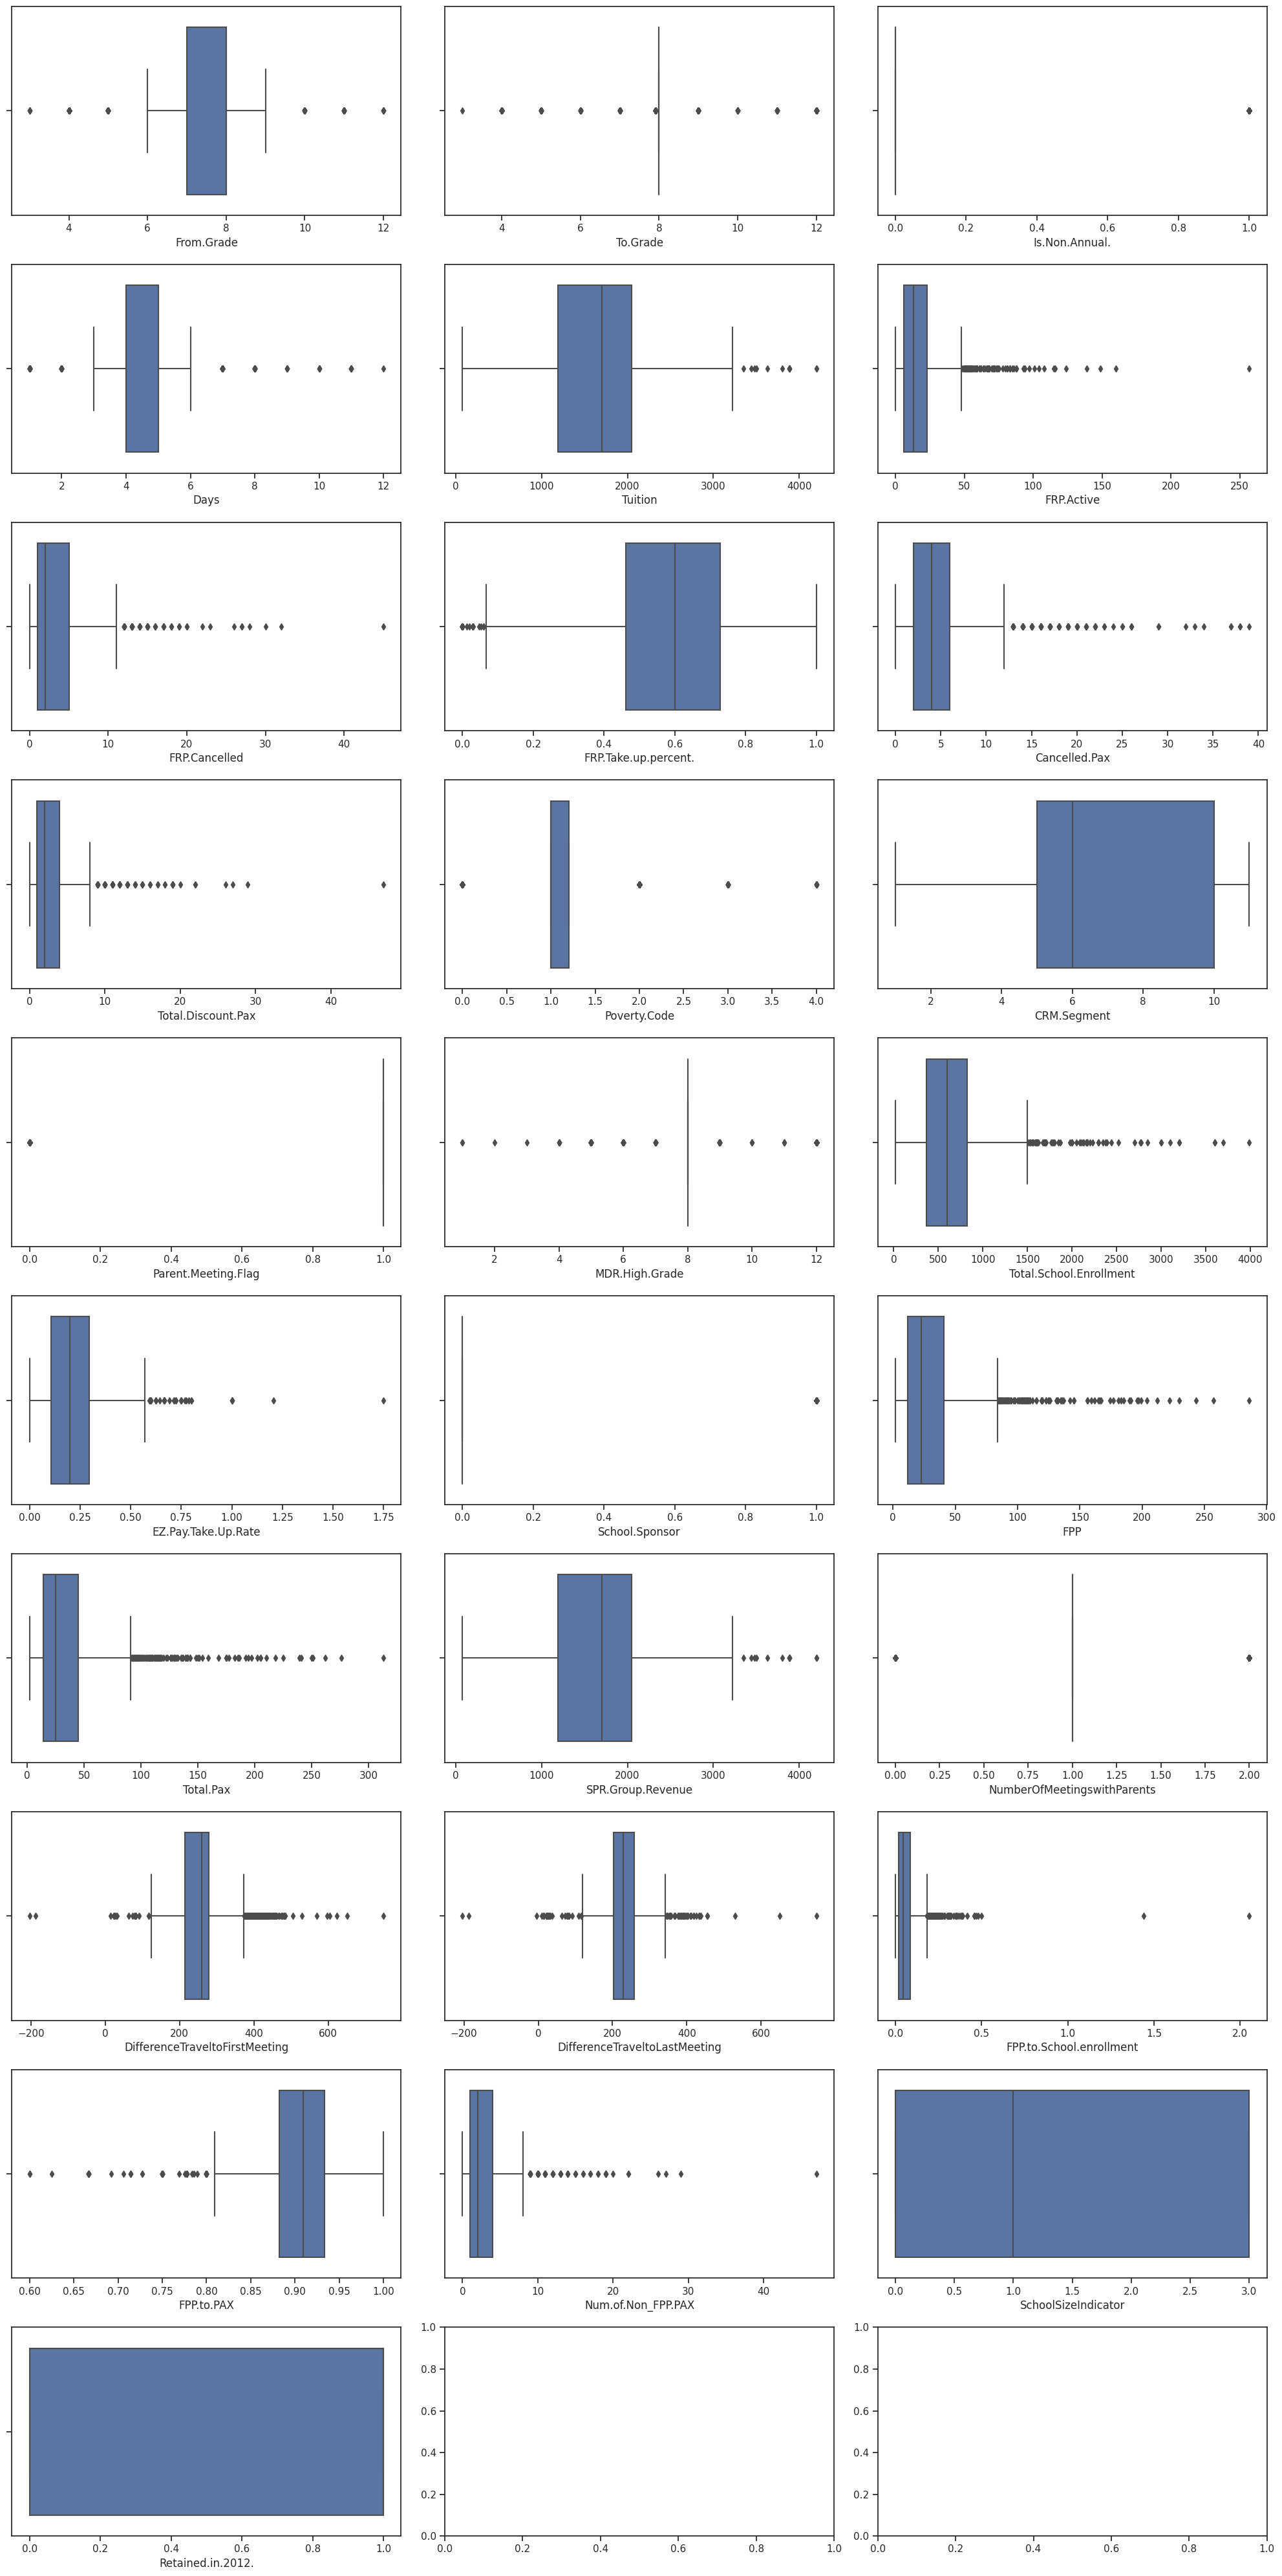

In [364]:
# Documentar sns.boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',]

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
    
plt.show()

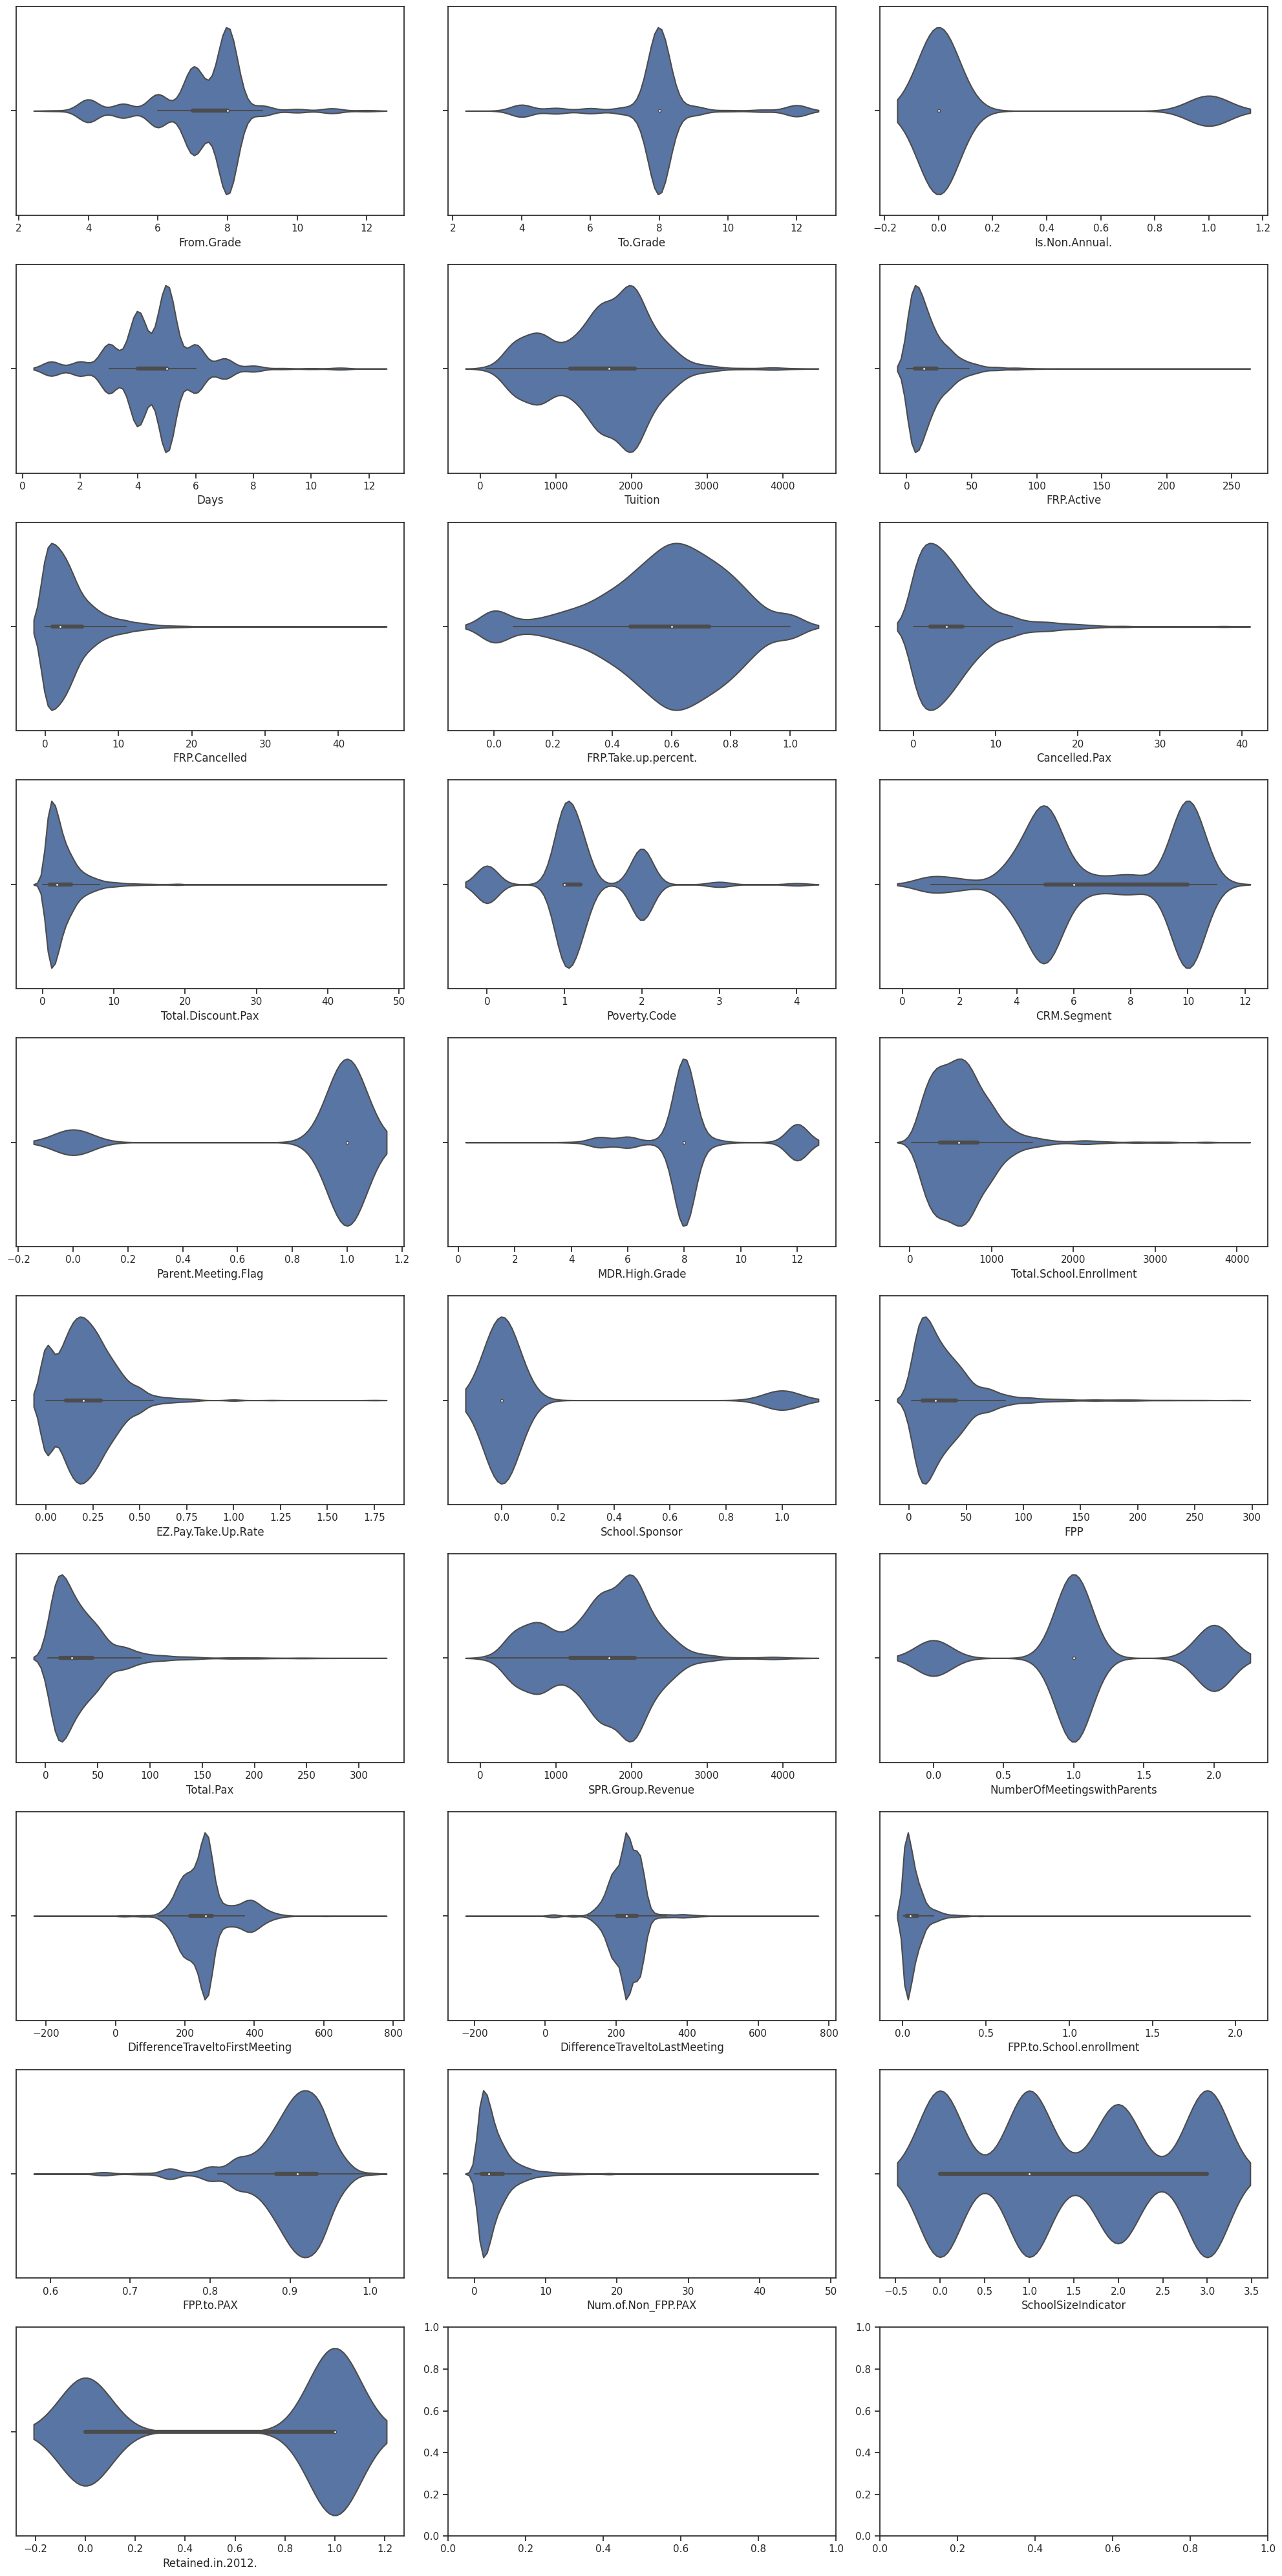

In [365]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.',]

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.violinplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
    
plt.show()

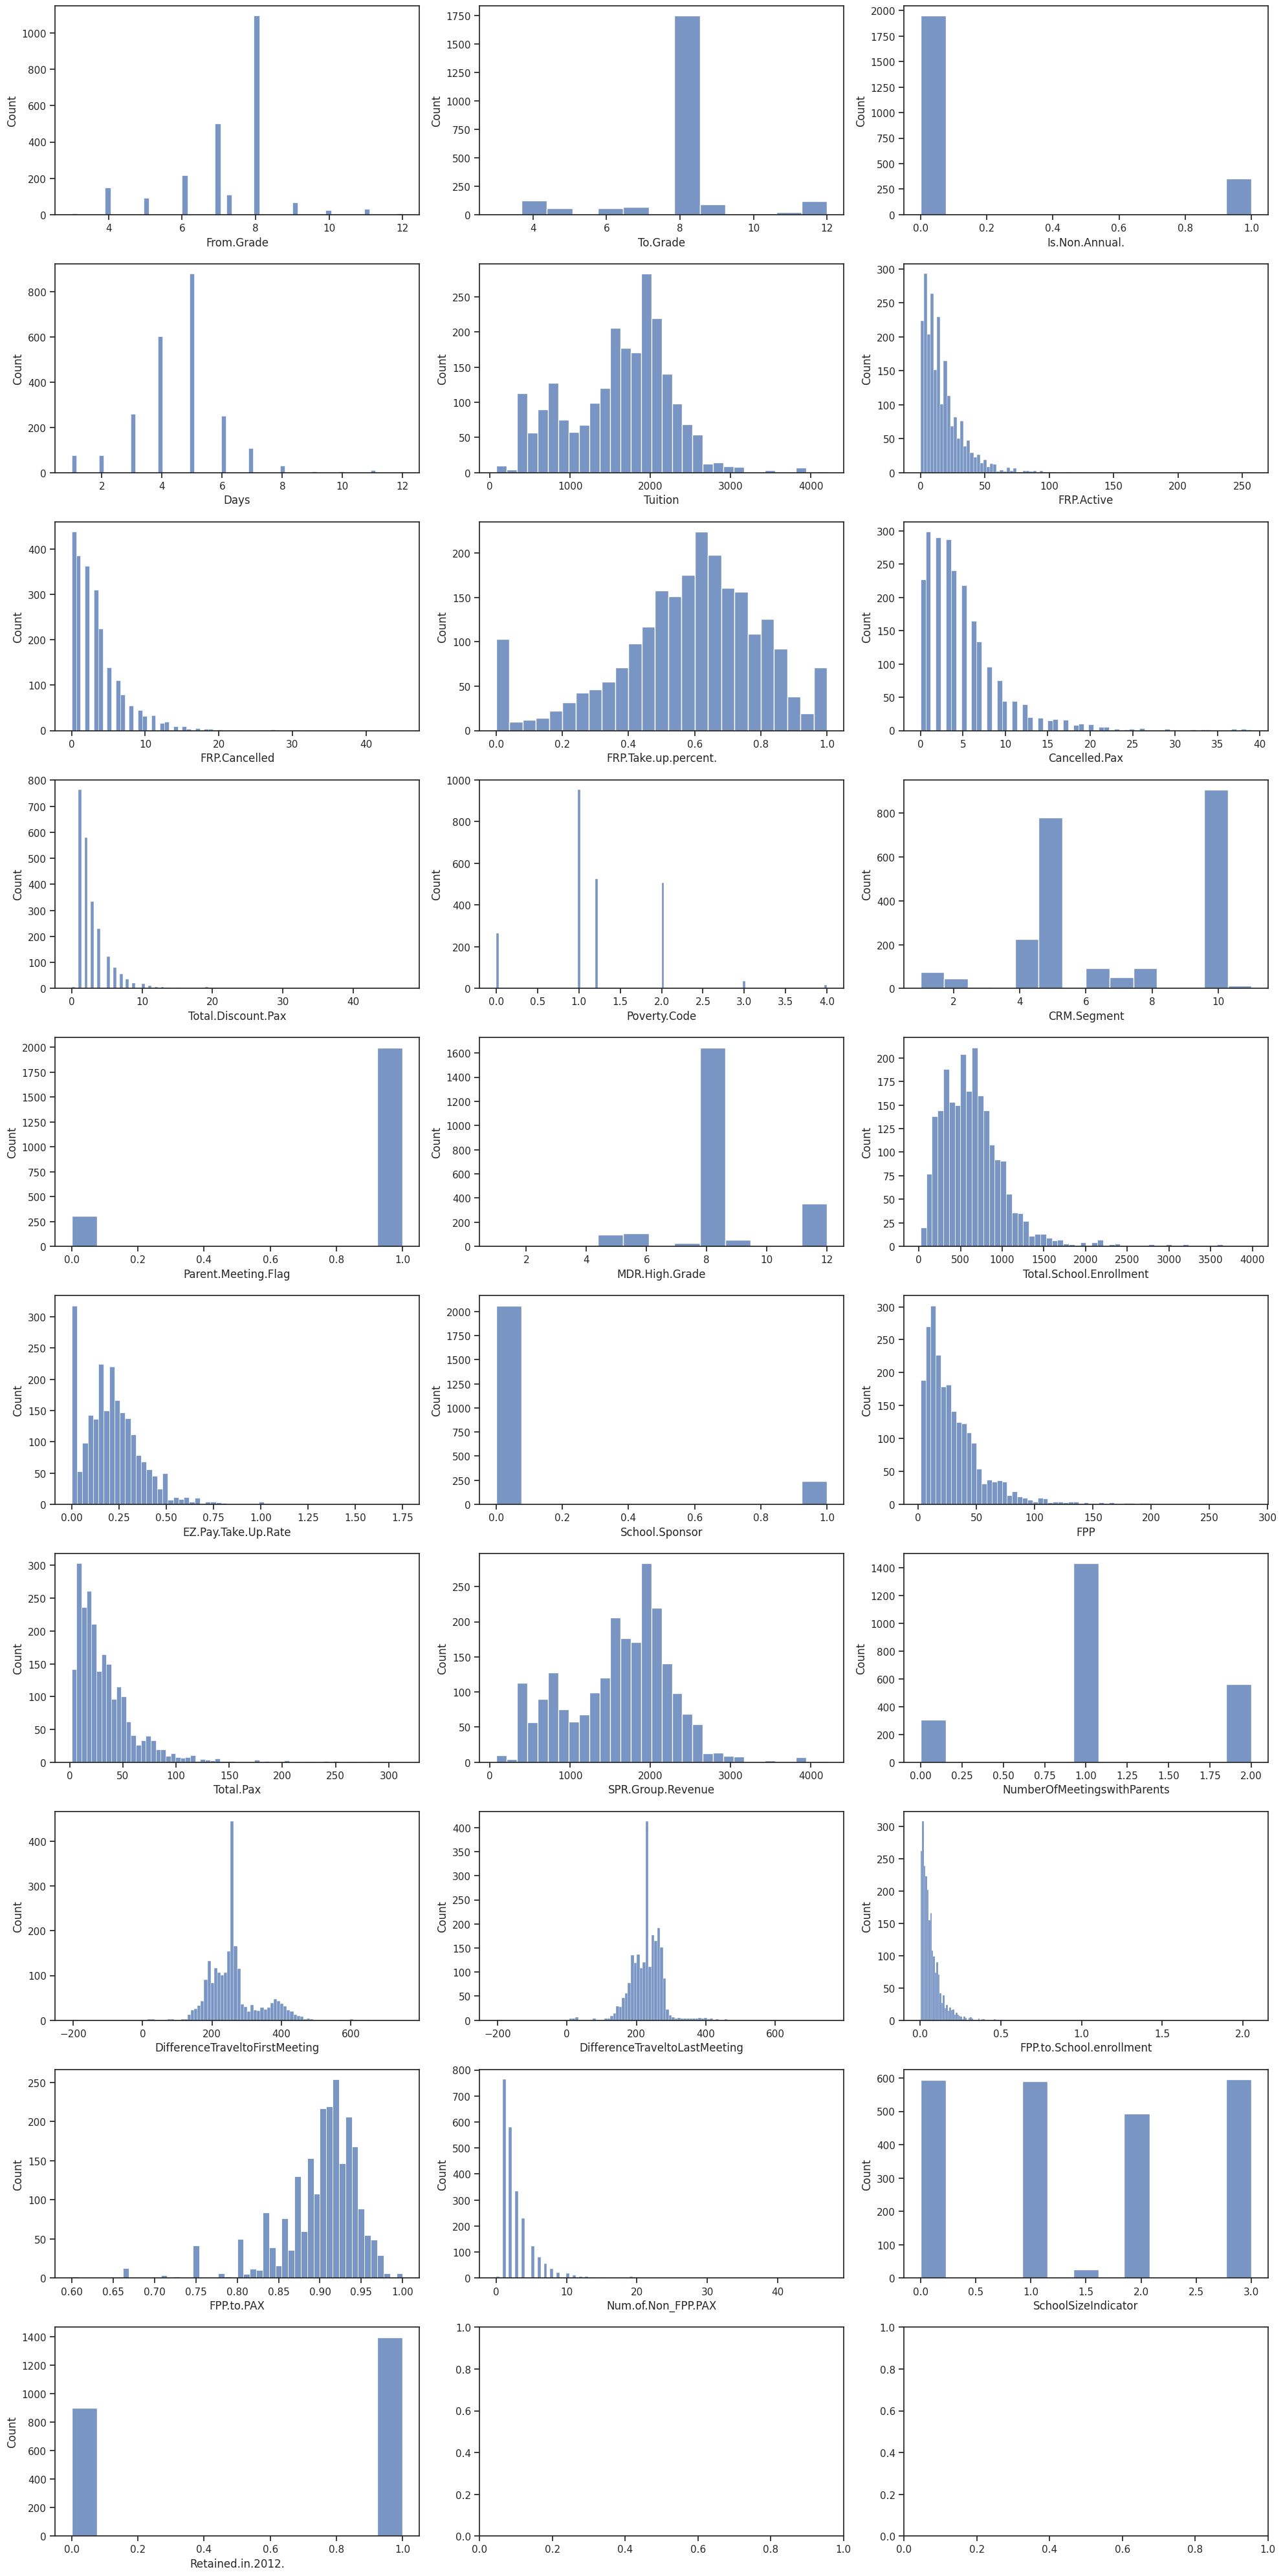

In [366]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.']

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.histplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()
    
plt.show()

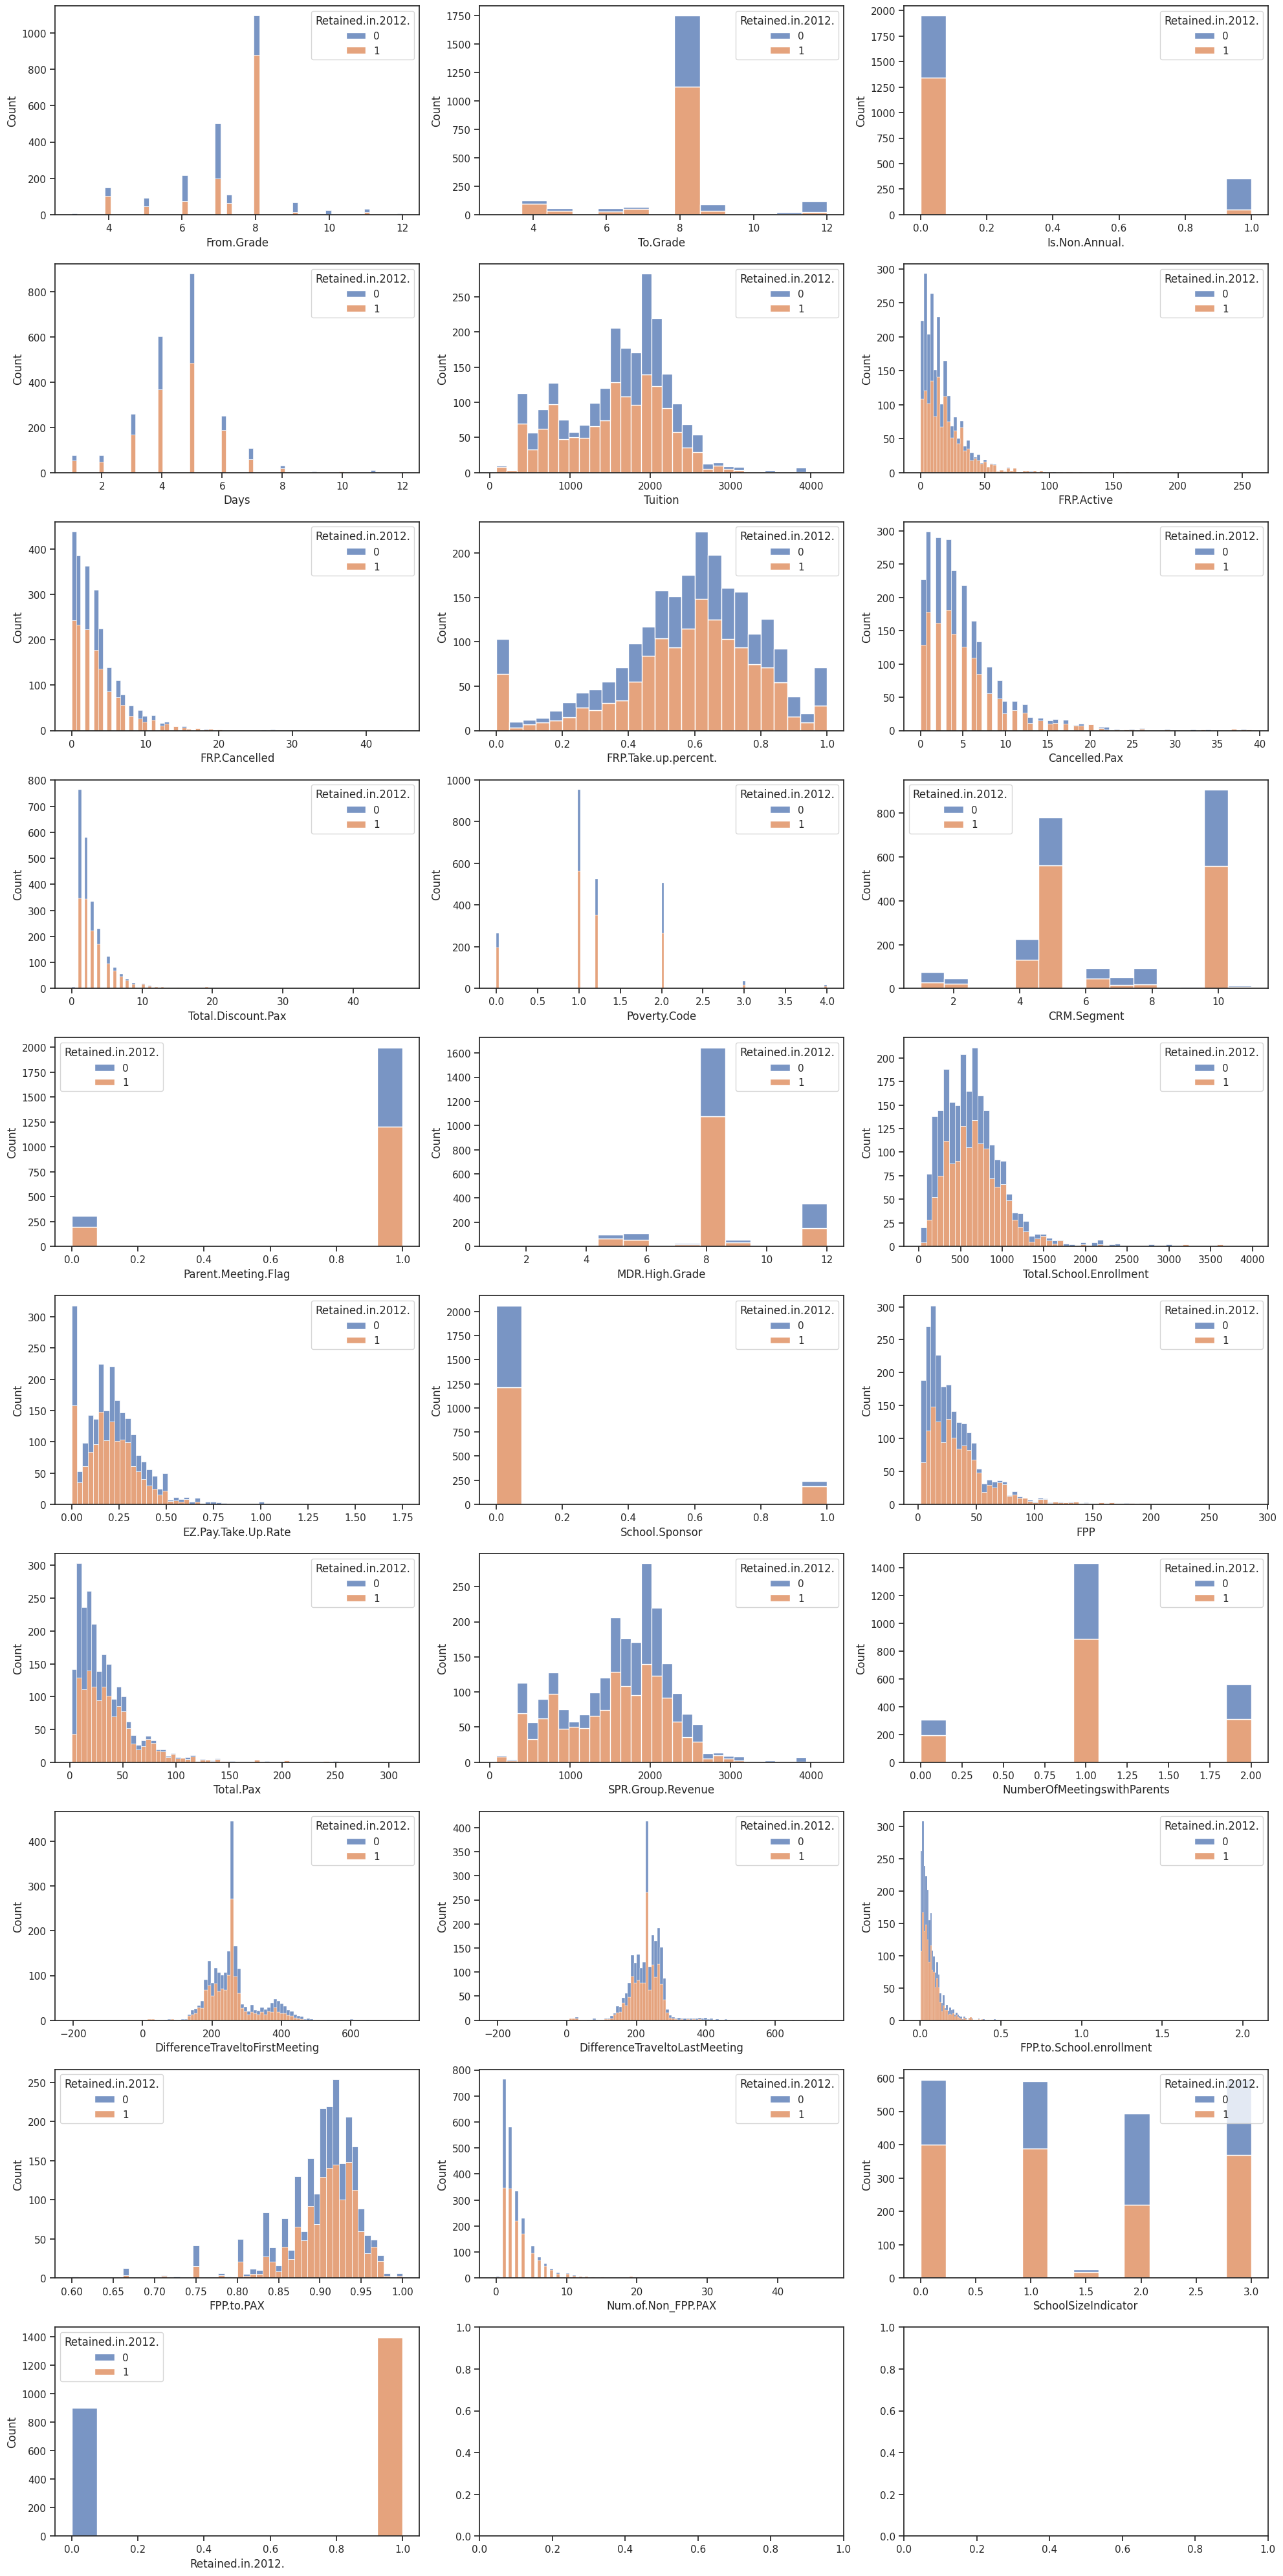

In [367]:
num_vars = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled',
                   'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'Poverty.Code', 'CRM.Segment',
                   'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
                   'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
                   'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                   'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'SchoolSizeIndicator', 'Retained.in.2012.']

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
axs = axs.flatten()

for i, var in enumerate(num_vars): 
    sns.histplot(x=var, hue="Retained.in.2012.", data=df, ax=axs[i], multiple="stack")
    
fig.tight_layout()
    
plt.show()

# **REGRESIÓN LOGÍSTICA**

# **PROCESAMIENTO DE DATOS**

**Utilizar pandas.Series.unique**
Devuelve valores únicos de una serie de objetos.

Los valor únicos se devuelven en orden de aparición. Los valores Únicos se basan en tablas hash, por lo tanto, NO se ordenan.

https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

Las variables categorícas las vamos a convertir a numero: "Program.Code", "Group.State", "Travel.Type", "Special.Pay", "Region", "School.Type", "MDR.Low.Grade", "Income.Level", "SPR.Product.Type", "SPR.New.Existing", "SchoolGradeTypeLow", "SchoolGradeTypeHigh","SchoolGradeType", "DepartureMonth", "GroupGradeTypeLow", "GroupGradeTypeHigh", "GroupGradeType","MajorProgramCode"

In [368]:
df['Program.Code'].unique()

array(['HS', 'HC', 'HD', 'SG', 'CC', 'CD', 'SM', 'HN', 'HG', 'HP', 'SK',
       'HW', 'SC', 'IC', 'HY', 'HVP', 'CVP', 'HF', 'ST', 'HZ', 'CN', 'HO',
       'HX', 'HIS', 'SD', 'HH', 'IK'], dtype=object)

In [369]:
df['Group.State'].unique()

array(['CA', 'AZ', 'FL', 'LA', 'MA', 'TX', 'VA', 'IA', 'MI', 'NY', 'OH',
       'MN', 'AR', 'IL', 'IN', 'WI', 'MO', 'ID', 'TN', 'KS', 'AL', 'MS',
       'KY', 'OR', 'NE', 'CO', 'SC', 'NM', 'HI', 'OK', 'AK', 'GA', 'NJ',
       'WA', 'NV', 'RI', 'NC', 'MT', 'CT', 'UT', 'PA', 'ME', 'MD', 'VT',
       'NH', 'WV', 'SD', 'ND', 'WY'], dtype=object)

In [370]:
df['Travel.Type'].unique()

array(['A', 'T', 'B', 'N'], dtype=object)

In [371]:
df['Special.Pay'].unique()

array(['STC', 'CP', 'FR', 'SA'], dtype=object)

In [372]:
df['Region'].unique()

array(['Southern California', 'Other', 'Houston', 'Northern California',
       'Dallas', 'Pacific Northwest'], dtype=object)

In [373]:
df['School.Type'].unique()

array(['PUBLIC', 'Catholic', 'CHD', 'Private non-Christian'], dtype=object)

In [374]:
df['MDR.Low.Grade'].unique()

array(['K', '7', '6', '10', '9', 'PK', '5', '3', '2', '1', '4', '8'],
      dtype=object)

In [375]:
df['Income.Level'].unique()

array(['Q', 'A', 'O', 'C', 'I', 'G', 'K', 'L', 'N', 'H', 'E', 'M', 'P',
       'J', 'P3', 'Z', 'B', 'F', 'D', 'P4', 'P1'], dtype=object)

In [376]:
df['SPR.Product.Type'].unique()

array(['CA History', 'East Coast', 'Science', 'Costa Rica',
       'International', 'IL History'], dtype=object)

In [377]:
df['SPR.New.Existing'].unique()

array(['EXISTING', 'NEW'], dtype=object)

In [378]:
df['SchoolGradeTypeLow'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [379]:
df['SchoolGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'High', 'Undefined'], dtype=object)

In [380]:
df['SchoolGradeType'].unique()

array(['Elementary->Elementary', 'Middle->Middle', 'High->High',
       'Undefined->Undefined', 'Middle->Undefined', 'Elementary->Middle',
       'Middle->High', 'Elementary->High', 'Elementary->Undefined'],
      dtype=object)

In [381]:
df['DepartureMonth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [382]:
df['GroupGradeTypeLow'].unique()

array(['K', 'Middle', 'High', 'PK', 'Elementary'], dtype=object)

In [383]:
df['GroupGradeTypeHigh'].unique()

array(['Elementary', 'Middle', 'High'], dtype=object)

In [384]:
df['GroupGradeType'].unique()

array(['K->Elementary', 'Middle->Middle', 'High->High', 'Middle->High',
       'PK->Middle', 'K->High', 'Elementary->Middle', 'PK->High',
       'K->Middle', 'Elementary->Elementary', 'PK->Elementary',
       'Elementary->High'], dtype=object)

In [385]:
df['MajorProgramCode'].unique()

array(['H', 'S', 'C', 'I'], dtype=object)

# **Transformar datos**
**El paquete sklearn.preprocessing proporciona varias funciones comunes que son de utilidad en la transformación de clases**
para cambiar los vectores de características en una representación que sea más adecuada para los estimadores posteriores.

**En general, los algoritmos de aprendizaje se benefician de la estandarización del conjunto de datos.**
https://scikit-learn.org/stable/modules/preprocessing.html

In [386]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Program.Code']= label_encoder.fit_transform(df['Program.Code'])
df['Program.Code'].unique()

array([13,  4,  5, 23,  0,  1, 25, 10,  7, 12, 24, 15, 21, 19, 17, 14,  3,
        6, 26, 18,  2, 11, 16,  9, 22,  8, 20])

In [387]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Group.State']= label_encoder.fit_transform(df['Group.State'])
df['Group.State'].unique()

array([ 4,  3,  7, 16, 17, 41, 43, 10, 20, 32, 33, 21,  2, 12, 13, 46, 22,
       11, 40, 14,  1, 23, 15, 35, 27,  5, 38, 30,  9, 34,  0,  8, 29, 45,
       31, 37, 25, 24,  6, 42, 36, 19, 18, 44, 28, 47, 39, 26, 48])

In [388]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Travel.Type']= label_encoder.fit_transform(df['Travel.Type'])
df['Travel.Type'].unique()

array([0, 3, 1, 2])

In [389]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Special.Pay']= label_encoder.fit_transform(df['Special.Pay'])
df['Special.Pay'].unique()

array([3, 0, 1, 2])

In [390]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Region']= label_encoder.fit_transform(df['Region'])
df['Region'].unique()

array([5, 3, 1, 2, 0, 4])

In [391]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['School.Type']= label_encoder.fit_transform(df['School.Type'])
df['School.Type'].unique()

array([2, 1, 0, 3])

In [392]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['MDR.Low.Grade']= label_encoder.fit_transform(df['MDR.Low.Grade'])
df['MDR.Low.Grade'].unique()

array([10,  7,  6,  1,  9, 11,  5,  3,  2,  0,  4,  8])

In [393]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Income.Level']= label_encoder.fit_transform(df['Income.Level'])
df['Income.Level'].unique()

array([19,  0, 14,  2,  8,  6, 10, 11, 13,  7,  4, 12, 15,  9, 17, 20,  1,
        5,  3, 18, 16])

In [394]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SPR.Product.Type']= label_encoder.fit_transform(df['SPR.Product.Type'])
df['SPR.Product.Type'].unique()

array([0, 2, 5, 1, 4, 3])

In [395]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SPR.New.Existing']= label_encoder.fit_transform(df['SPR.New.Existing'])
df['SPR.New.Existing'].unique()

array([0, 1])

In [396]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeTypeLow']= label_encoder.fit_transform(df['SchoolGradeTypeLow'])
df['SchoolGradeTypeLow'].unique()

array([0, 2, 1, 3])

In [397]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeTypeHigh']= label_encoder.fit_transform(df['SchoolGradeTypeHigh'])
df['SchoolGradeTypeHigh'].unique()

array([0, 2, 1, 3])

In [398]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['SchoolGradeType']= label_encoder.fit_transform(df['SchoolGradeType'])
df['SchoolGradeType'].unique()

array([0, 6, 4, 8, 7, 2, 5, 1, 3])

In [399]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DepartureMonth']= label_encoder.fit_transform(df['DepartureMonth'])
df['DepartureMonth'].unique()

array([2, 1, 4, 0, 5, 3])

In [400]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeTypeLow']= label_encoder.fit_transform(df['GroupGradeTypeLow'])
df['GroupGradeTypeLow'].unique()

array([2, 3, 1, 4, 0])

In [401]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeTypeHigh']= label_encoder.fit_transform(df['GroupGradeTypeHigh'])
df['GroupGradeTypeHigh'].unique()

array([0, 2, 1])

In [402]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['GroupGradeType']= label_encoder.fit_transform(df['GroupGradeType'])
df['GroupGradeType'].unique()

array([ 4,  8,  3,  7, 11,  5,  2, 10,  6,  0,  9,  1])

In [403]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['MajorProgramCode']= label_encoder.fit_transform(df['MajorProgramCode'])
df['MajorProgramCode'].unique()

array([1, 3, 0, 2])

In [404]:
df.head()

Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
ID                                                                          
1             13         4.0       4.0            4               0     1   
2              4         8.0       8.0            3               0     7   
3              5         8.0       8.0            7               0     3   
5              5         6.0       8.0            7               0     6   
6              4        10.0      12.0           16               0     4   

    Travel.Type Departure.Date Return.Date Deposit.Date  Special.Pay  Tuition  \
ID                                                                              
1             0     2011-01-14  2011-01-14   2010-08-30            3      424   
2             0     2011-01-14  2011-01-21   2009-11-15            0     2350   
3             0     2011-01-15  2011-01-17   2010-10-15            3     1181   
5             3     2011-01-16  2011-01-21   2010-09-30            3      865   
6             0     2011-01-17  2011-01-20   2010-09-30            3     2025   

    FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL Latest.RPL  \
ID                                                                          
1           25              3                 0.424 2010-03-29 2010-08-12   
2            9              9                 0.409 2009-10-20 2010-08-10   
3           17              6                 0.708 2010-04-29 2010-08-16   
5           40              8                 0.494 2010-03-29 2010-08-12   
6            9              4                 0.900 2010-03-16 2010-10-06   

    Cancelled.Pax  Total.Discount.Pax Initial.System.Date  Poverty.Code  \
ID                                                                        
1               3                   4          2010-03-26           1.0   
2              11                   3          2009-10-02           2.0   
3               6                   3          2010-01-28           2.0   
5               9                   8          2010-03-23           3.0   
6               3                   1          2010-03-16           2.0   

    Region  CRM.Segment  School.Type  Parent.Meeting.Flag  MDR.Low.Grade  \
ID                                                                         
1        5          4.0            2                    1             10   
2        3         10.0            2                    1              7   
3        3         10.0            2                    1              6   
5        3         10.0            2                    1              6   
6        3          8.0            2                    1              1   

    MDR.High.Grade  Total.School.Enrollment  Income.Level  \
ID                                                          
1              5.0                    927.0            19   
2              8.0                    850.0             0   
3              8.0                    955.0            14   
5              8.0                    720.0             2   
6             12.0                    939.0             8   

    EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
ID                                                                            
1                 0.170               1                 0                 0   
2                 0.091               0                 2                 0   
3                 0.042               0                 2                 0   
5                 0.383               0                 2                 0   
6                 0.100               0                 2                 1   

    FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                                   
1    59         63                424                            1   
2    22         25               2350                            2   
3    24         27               11

In [405]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Departure.Date']= label_encoder.fit_transform(df['Departure.Date'])
df['Departure.Date'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [406]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Return.Date']= label_encoder.fit_transform(df['Return.Date'])
df['Return.Date'].unique()

array([  0,   3,   1,   2,   4,   5,   6,   7,   8,   9,  11,  10,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  22,  24,
        26,  27,  28,  31,  29,  30,  32,  33,  34,  39,  36,  37,  35,
        38,  40,  41,  42,  43,  44,  45,  46,  47,  49,  48,  53,  50,
        51,  52,  54,  55,  56,  57,  58,  59,  61,  60,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  75,  77,
        78,  79,  80,  81,  83,  82,  84,  87,  85,  88,  86,  89,  90,
        93,  91,  94,  92,  95,  96, 100,  97, 101,  98,  99, 102, 103,
       104, 107, 105, 108, 106, 109, 110, 111, 112, 113, 115, 114, 116,
       117, 121, 118, 120, 119, 124, 122, 123, 129, 125, 126, 127, 128,
       130, 131, 132, 136, 134, 133, 135, 137, 138, 139])

In [407]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Deposit.Date']= label_encoder.fit_transform(df['Deposit.Date'])
df['Deposit.Date'].unique()

array([ 13,   1,  40,  26,   9,  50,  34,  22,  27,  54,  57,  30,  48,
        45,  65,  47,  33,  69,  67,  53, 108,  62,  63,  37,  20,  76,
        55,  61,  59,  29,  56,  43,  44,  14,  36,  73,  51,  64,  24,
        87,  82, 100,  38,  72,  16,  81,  52,  99, 104,  84,  15,  25,
        35,  39, 112,  58,  17,  96,  93,  23,  28,  10,  31,  98,  78,
        90,  95,  60,  91,  42,  71,  46,  79,  97,  11,   0,  32, 102,
       114,  19,   4, 101,   6,  12,  21,  41,  18,  77,  70,  66, 107,
        92, 105, 115, 111,   8, 121,   2,  83,   7, 110, 103, 120, 124,
       123, 116, 113,  80,  86,  85, 122, 109,   5,  49, 118, 119, 117,
        88,   3,  94,  74,  75,  89,  68, 106])

In [408]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Early.RPL']= label_encoder.fit_transform(df['Early.RPL'])
df['Early.RPL'].unique()

array([ 72,  14,  95,  63,  50,  41,  75, 163,  40,  49,  52,  85,  36,
        73,  21,  54,  55,  27,  77,  88,  62,  80,  42,  53,  37, 101,
        31,  71, 175, 113, 109, 177,  45,  65, 178,  84, 156,  92,  70,
        82,  68,  58, 102,  89,  28,  60,  78, 146, 162,  33,  69,  98,
        64,  90,  47,  91,  43, 100, 106, 144,  99, 132,  81, 192,  86,
       159,  39, 160,  94,  59,  35,  96, 166, 133,  97, 152,  18,  38,
        51, 191, 149, 168, 198,  56,  46,  76,  74, 176, 143,  61, 103,
        34,  83,  79, 190, 201, 111, 188,  57,  44,  93, 139, 189,  87,
       165, 173, 184, 157, 112, 179, 181,  66,   3, 107, 172, 182, 150,
       123, 148, 194, 108, 205, 136, 110, 155,  30, 104, 115, 142,  25,
       138, 161, 167, 220,  29, 171, 147,  67, 174, 164,  22, 105, 180,
        15, 169, 126, 114, 212, 117, 210, 120, 196,  32,  13,   7, 206,
       183, 153, 217,   2,   9, 158,  19,   6, 121, 145, 200, 187, 170,
         4, 141, 124, 219, 140, 226, 215, 118, 122,  11, 127, 19

In [409]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Latest.RPL']= label_encoder.fit_transform(df['Latest.RPL'])
df['Latest.RPL'].unique()

array([113, 111, 115, 153, 128,  22, 112, 129, 119, 125, 121, 127, 152,
       126, 135, 137, 124, 116, 131, 122, 118, 141,  82, 130, 107, 143,
       144,  12,  73,  78,  45, 140, 123, 108, 134, 133,  21, 109,  28,
       148, 110, 120, 106, 142, 105,  63, 132, 139,  96, 159,  97,   9,
        20, 114, 158, 165, 117, 155,  36,  55,  60,  31,  46, 157, 168,
       147, 103, 138, 156,  59, 151,  69, 146,  68,  43, 145,   2, 161,
       172, 100, 136, 179,  30, 102,  80, 187,  29,  37,  25,  72,  91,
        38,  75, 191,  85, 177,  67,  92,  66,  16, 162,  64,  19, 163,
        61,  65,  57,  27,   7,   4, 171, 173, 149, 184,  42,   6,  48,
        10,  49,  53,   3, 167,  83, 154,  52,   0,  17, 186,  94,  88,
       195,  40, 206, 182, 178,  47,  86,  99,  34,  14, 164,  24,  81,
       101,  70,  90,  76, 192,  18,  15, 203,   8, 197, 189,  62, 166,
       160,  95,  79, 208, 207,  89,  71,   5, 174, 169,  77, 150,  51,
        35, 183, 185, 196, 204, 170,  98, 209, 194, 193, 104, 19

In [410]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Initial.System.Date']= label_encoder.fit_transform(df['Initial.System.Date'])
df['Initial.System.Date'].unique()

array([100,  17,  51,  98,  92,  75,  63, 104,  74,  76, 115,  58, 103,
        62,  27,  79,  81,  47,  69,  97,  89,  50,  67, 106,  44,  53,
       134,  80, 223, 132, 137,  86,  96, 226,  93,  43, 225,  42, 145,
         6, 126,  70,  73, 110,  95, 135, 111, 108, 172, 173,  55,  99,
        49, 125, 128, 181,  31, 116, 122,  84,  30, 136,  87, 118,  68,
       139,  57,  88, 192,  71, 176, 121, 208,  56, 123,  83, 129, 211,
       177, 130, 200,  61,  25,  52, 230, 198, 214,  45, 245, 133, 102,
       191,  90,  54, 105, 114, 101, 213, 215, 237, 236, 217, 127,  72,
        65, 144,  66, 212, 232, 205, 124, 147,  64, 227,  46, 224,  39,
        94,   3, 140, 185, 158, 109, 231, 199, 221, 243, 113, 218, 219,
       254, 179, 119, 203, 117, 149, 210,  35,  59,  33, 143, 182,  40,
       146, 186, 270, 207, 163, 195, 209,  82, 168,  38,  48,  91, 197,
        60,  20, 131, 206, 216, 171, 164, 138, 261, 184, 238, 151, 142,
       160, 112, 259, 155,   7, 239, 247, 156,  22,  10, 150, 24

In [411]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['FirstMeeting']= label_encoder.fit_transform(df['FirstMeeting'])
df['FirstMeeting'].unique()

array([102,   6, 126, 110, 156, 177, 122, 127, 123, 128, 117,  57,  54,
        60, 118,  52, 135, 129, 124, 134, 139, 148,  68, 106, 105, 116,
        66,  25, 143,  71, 142,  46, 205, 140, 153, 112, 109, 132,  10,
       119, 107, 195, 131,  73,  80, 158, 115, 133, 121, 111,  16, 160,
       145,  17, 157,  59,  45,  72,  78,  74,  56, 141,  76, 151,  83,
       144,  51,  63,  95, 101, 164,  53, 159,  82,  11, 169, 154,  77,
        26,  67,  65, 196, 173,  70, 152,  23, 147,  62, 146,  58,  30,
        41,  40,  48, 166,  49,  50,  21,  75,  19, 184,  86,  55, 190,
       206, 136,  22, 165, 172, 163,  85,  13, 100, 179,  37, 167,  61,
         9, 178, 120,  29,  43,  32, 113, 130,  14, 183,  93, 108,  44,
       138,  42, 155, 180,  47,  90,  79, 150,  89,  28,  12,  94, 171,
        24, 125,  34,  38, 103,  33,  36, 104,  99, 188,  98,  81, 189,
        88,   4, 170,  15, 182,  35,  92, 194,   2,  18, 175, 201,  84,
       197,  91, 181, 114,   0,  39, 161, 186, 174, 162, 192, 19

In [412]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['LastMeeting']= label_encoder.fit_transform(df['LastMeeting'])
df['LastMeeting'].unique()

array([ 51,  62,  76,  59, 106, 129,  72,  77,  73,  78,  66,  74,  64,
        67,  80,  92,  79,  84,  89,  85,  98,  83,  55,  54,  65,  93,
       146,  13, 168,  90, 103,  61,  58,  82,   3,  68, 118, 151,  71,
        81, 108, 114,  60, 110,  86,  95, 107,  35,  56,  27,  91, 101,
        30,  94,  96,  46, 109,  37, 120, 104,  21,  97,  28,  18,  32,
       102, 153, 125, 122, 134,  20, 117, 113,  15, 136,  16, 143, 169,
        42, 115, 130,  69,  33,  49, 131,  24,  70,  29,   7,   9,  17,
       135, 100,  88, 105, 132,   6,  14, 159,  25,  38,  26,  12,  44,
       123,  75, 124,  52,  50,  53,  19, 141, 158, 142,  41, 121,   5,
       145, 137, 150,   4, 127, 160, 154, 133,  63, 161,  31,   0, 111,
       138, 112,  39, 126, 116, 152, 155,  47, 147, 148,  45, 149, 119,
        10, 140,  87,  57, 165, 128,  36,  43, 164,  22,  48,  40, 163,
        34, 156, 139,   1,  23, 162, 157,  11,   2,  99, 166,   8, 144,
       167])

In [420]:
df.head()

Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
ID                                                                          
1             13         4.0       4.0            4               0     1   
2              4         8.0       8.0            3               0     7   
3              5         8.0       8.0            7               0     3   
5              5         6.0       8.0            7               0     6   
6              4        10.0      12.0           16               0     4   

    Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
ID                                                                        
1             0               0            0            13            3   
2             0               0            3             1            0   
3             0               1            1            40            3   
5             3               2            3            26            3   
6             0               3            2            26            3   

    Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
ID                                                                        
1       424          25              3                 0.424         72   
2      2350           9              9                 0.409         14   
3      1181          17              6                 0.708         95   
5       865          40              8                 0.494         72   
6      2025           9              4                 0.900         63   

    Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
ID                                                                       
1          113              3                   4                  100   
2          111             11                   3                   17   
3          115              6                   3                   51   
5          113              9                   8                   98   
6          153              3                   1                   92   

    Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
ID                                                                        
1            1.0       5          4.0            2                    1   
2            2.0       3         10.0            2                    1   
3            2.0       3         10.0            2                    1   
5            3.0       3         10.0            2                    1   
6            2.0       3          8.0            2                    1   

    MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
ID                                                                         
1              10             5.0                    927.0            19   
2               7             8.0                    850.0             0   
3               6             8.0                    955.0            14   
5               6             8.0                    720.0             2   
6               1            12.0                    939.0             8   

    EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
ID                                                                            
1                 0.170               1                 0                 0   
2                 0.091               0                 2                 0   
3                 0.042               0                 2                 0   
5                 0.383               0                 2                 0   
6                 0.100               0                 2                 1   

    FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                                   
1    59         63                424                            1   
2    22         25               2350                            2   


# **Balancear las etiquetas:**

"Retained.in.2012." Label

# **Insertar un gráfico de barras para mostrar los conteos de observaciones en cada categeria usando barras.**

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

In [425]:
df.head(2)

Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
ID                                                                          
1             13         4.0       4.0            4               0     1   
2              4         8.0       8.0            3               0     7   

    Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
ID                                                                        
1             0               0            0            13            3   
2             0               0            3             1            0   

    Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
ID                                                                        
1       424          25              3                 0.424         72   
2      2350           9              9                 0.409         14   

    Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
ID                                                                       
1          113              3                   4                  100   
2          111             11                   3                   17   

    Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
ID                                                                        
1            1.0       5          4.0            2                    1   
2            2.0       3         10.0            2                    1   

    MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
ID                                                                         
1              10             5.0                    927.0            19   
2               7             8.0                    850.0             0   

    EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
ID                                                                            
1                 0.170               1                 0                 0   
2                 0.091               0                 2                 0   

    FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                                   
1    59         63                424                            1   
2    22         25               2350                            2   

    FirstMeeting  LastMeeting  DifferenceTraveltoFirstMeeting  \
ID                                                              
1            102           51                           155.0   
2              6           62                           423.0   

    DifferenceTraveltoLastMeeting  SchoolGradeTypeLow  SchoolGradeTypeHigh  \
ID                                                                           
1                           155.0                   0                    0   
2                           140.0                   2                    2   

    SchoolGradeType  DepartureMonth  GroupGradeTypeLow  GroupGradeTypeHigh  \
ID                                                                           
1                 0               2                  2                   0   
2                 6               2                  3                   2   

    GroupGradeType  MajorProgramCode  SingleGradeTripFlag  \
ID                                                          
1                4                 1                    1   
2                8                 1                    1   

    FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
ID                                                             
1                   0.063646    0.936508                   4   
2                   0.025882    0.880000                   3   

    SchoolSizeIndicator  Retained.in.2012.  
ID                                          
1                   0.0                  1  
2                   0.0                  1

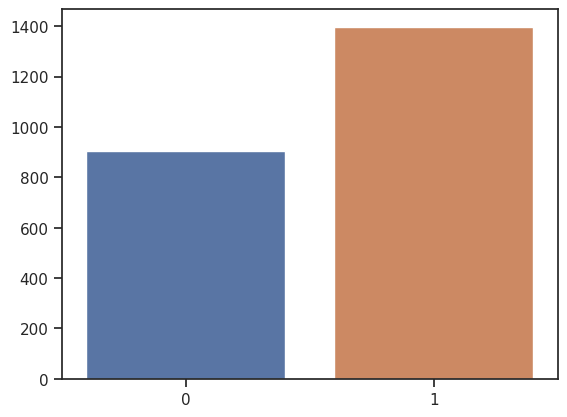

In [431]:
sns.barplot(x=df['Retained.in.2012.'].value_counts().index, y=df['Retained.in.2012.'].value_counts().values)
plt.show()

In [435]:
df['Retained.in.2012.'].value_counts()

1    1398
0     903
Name: Retained.in.2012., dtype: int64

# **Usar función resample https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html**

In [438]:
from sklearn.utils import resample
#Crear dos diferentes dataframe de una clase mayoritaria y minoritaria
df_majority = df[(df['Retained.in.2012.']==1)] 
df_minority = df[(df['Retained.in.2012.']==0)] 

# muestreo ascendente de la clase minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # muesta con reemplazo 
                                 n_samples= 1398, # para que coincida con la clase mayoritaria
                                 random_state=0)   # resultados reproducible

# Combinar la clase mayoritaria con la muestra ascendente de la clase minoritaria 
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

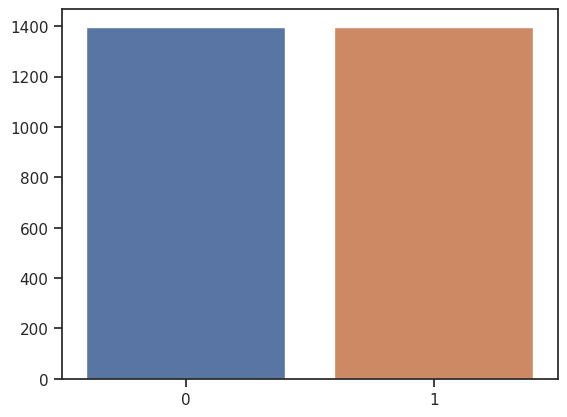

In [441]:
sns.barplot(x=df_upsampled['Retained.in.2012.'].value_counts().index, y=df_upsampled['Retained.in.2012.'].value_counts().values)
plt.show()

In [444]:
df_upsampled.shape

(2796, 55)

# **Eliminar outliers usando IQR**
Detectar outlier es tedioso, especialmente cuando se tienen multiples tipos de datos.

Por lo tanto, tenemos diferentes formas de detectar valores atípicos para diferentes tipos de datos.

En cuanto a los datos distribuidos normalmente, podemos obtener el método Z-Score;

Para skewed data, se usa IQR.

# **IQR es la diferencia entre el cuartil 75th and 25th.**

In [445]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = ['Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled', 'Cancelled.Pax', 'Total.Discount.Pax',
                    'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate', 'FPP', 'Total.Pax', 'SPR.Group.Revenue',
                    'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'FPP.to.School.enrollment',
                    'FPP.to.PAX', 'Num.of.Non_FPP.PAX']

# Solicitar la función que remueve los outliers usando IQR
df_clean = remove_outliers_iqr(df_upsampled, columns_to_check)

# Mostrar el resultado en el dataframe
df_clean.head()

Program.Code  From.Grade  To.Grade  Group.State  Is.Non.Annual.  Days  \
ID                                                                            
1829             5         8.0       9.0           42               0     5   
583             14         6.0       8.0            6               0     3   
1991             5         7.0       8.0            4               0     5   
1110             5         6.0       6.0           38               0     4   
82               1         7.0       8.0           40               1     4   

      Travel.Type  Departure.Date  Return.Date  Deposit.Date  Special.Pay  \
ID                                                                          
1829            0             118          116            67            3   
583             1              58           55            96            2   
1991            0             123          121            73            3   
1110            1              90           87            57            3   
82              0              26           24            26            1   

      Tuition  FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Early.RPL  \
ID                                                                          
1829     2031           3              0                 0.375        112   
583       516           0              0                 0.000        182   
1991     2060           0              3                 0.000        170   
1110      792          27              3                 0.643         77   
82       1324          41              1                 0.774        102   

      Latest.RPL  Cancelled.Pax  Total.Discount.Pax  Initial.System.Date  \
ID                                                                         
1829         139              0                   1                  147   
583          148              4                   2                  231   
1991         136              8                   2                  216   
1110         125              4                   2                  106   
82           108              3                   5                   93   

      Poverty.Code  Region  CRM.Segment  School.Type  Parent.Meeting.Flag  \
ID                                                                          
1829      1.000000       3         10.0            2                    1   
583       2.000000       3          2.0            2                    1   
1991      1.000000       2          5.0            2                    1   
1110      1.204367       3          4.0            0                    1   
82        1.204367       3         10.0            0                    1   

      MDR.Low.Grade  MDR.High.Grade  Total.School.Enrollment  Income.Level  \
ID                                                                           
1829              7             9.0                    558.0            13   
583              11             8.0                    429.0             3   
1991             10             8.0                    810.0            19   
1110             11             6.0                    409.0             8   
82               11             8.0                    365.0            12   

      EZ.Pay.Take.Up.Rate  School.Sponsor  SPR.Product.Type  SPR.New.Existing  \
ID                                                                              
1829                0.250               0                 2                 0   
583                 0.000               0                 2                 1   
1991                0.154               0                 2                 1   
1110                0.095               0                 2                 0   
82                  0.245               0                 2                 0   

      FPP  Total.Pax  SPR.Group.Revenue  NumberOfMeetingswithParents  \
ID                                                                     
1829    8          9               2031 

In [446]:
df_clean.shape

(1411, 55)

# **Correlación mostrando un heatmap**
Seaborn es una biblioteca de python que permite hacer mejores gráficos fácilmente gracias a su función heatmap(). Un mapa de calor es una representación gráfica de datos donde cada valor de una matriz se representa como un color.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

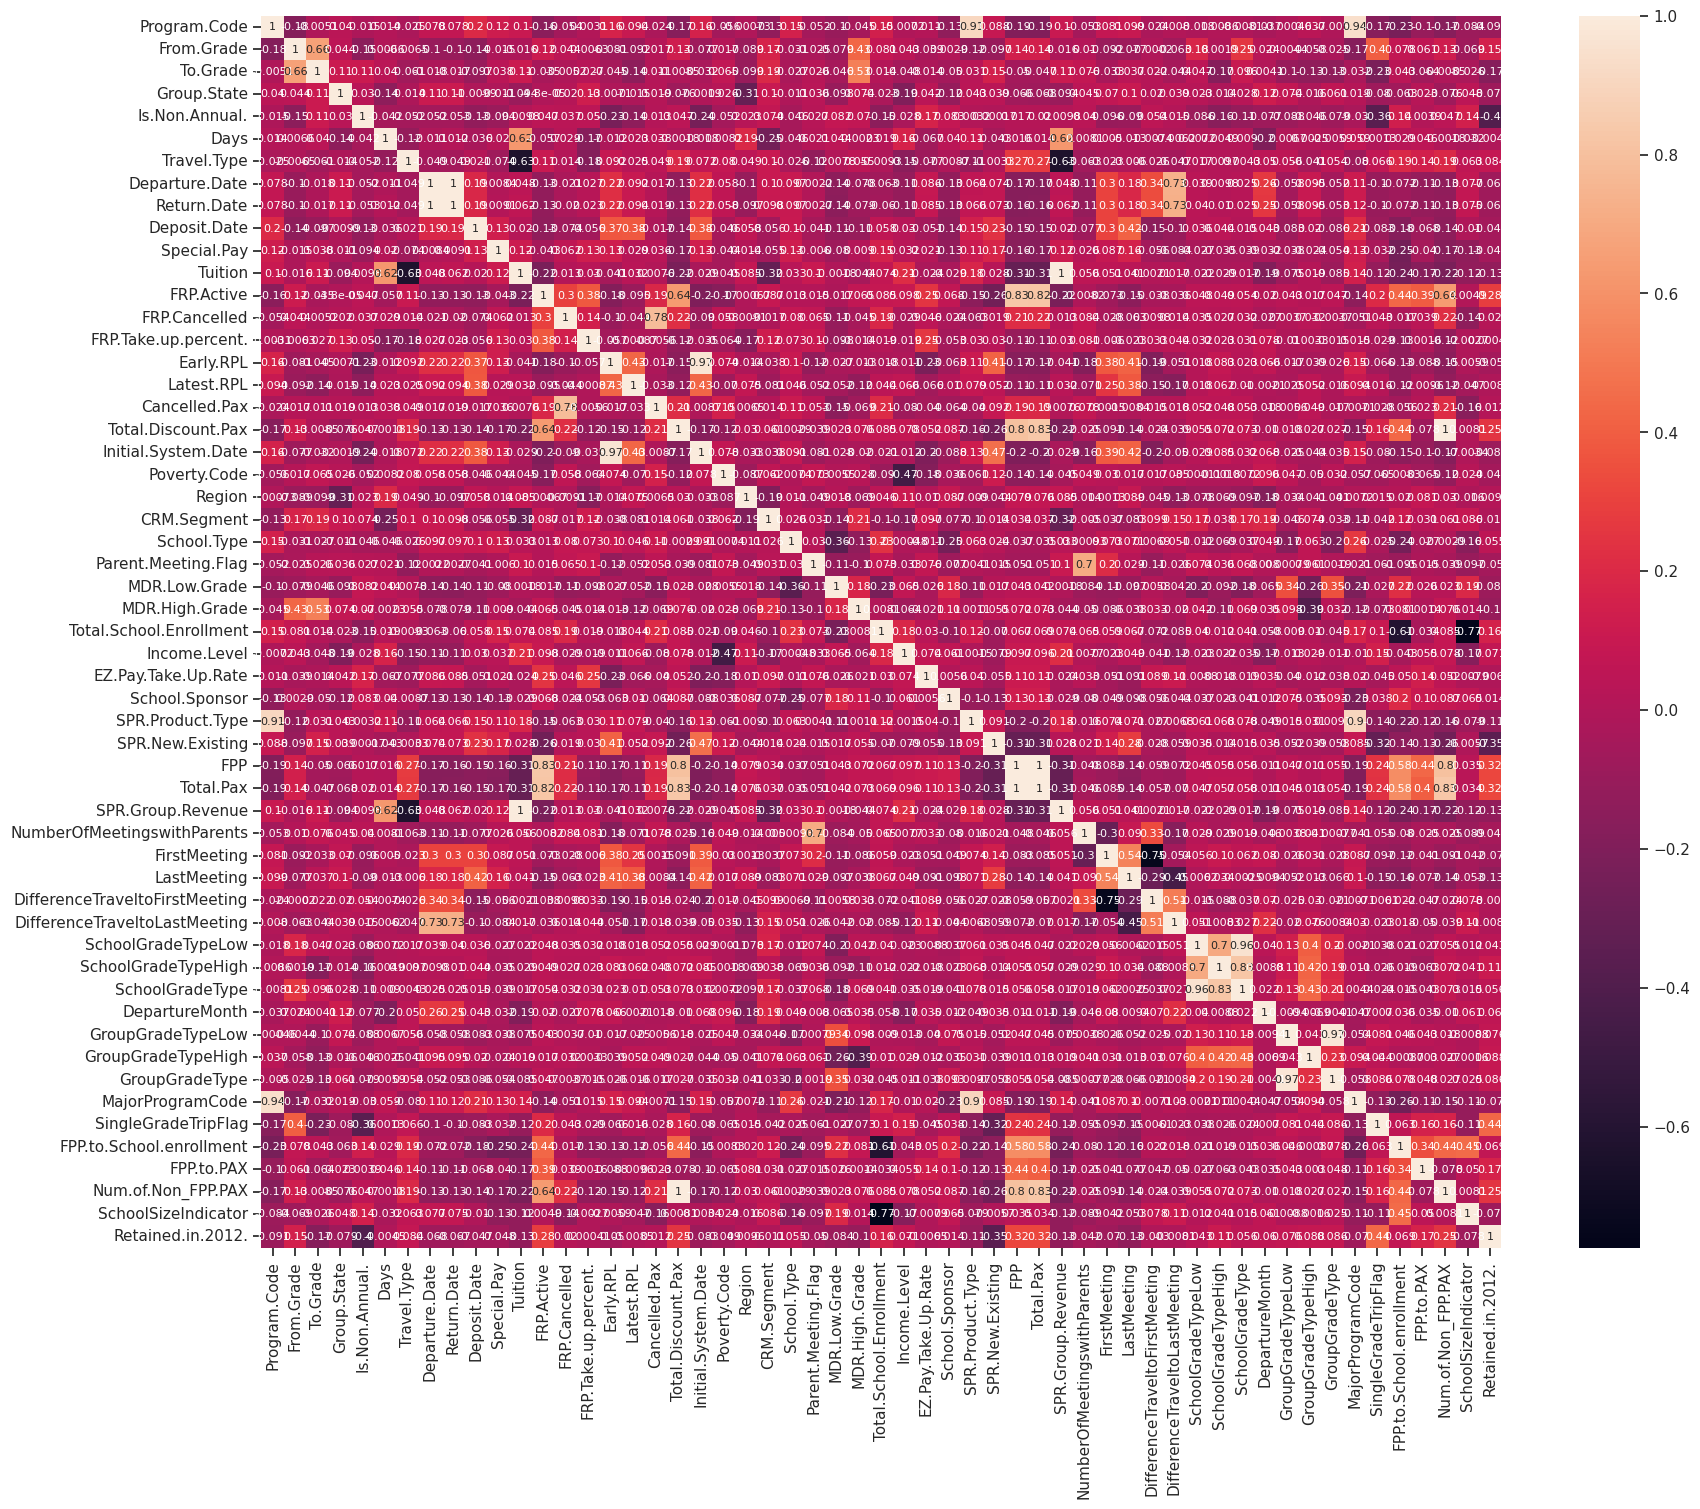

In [470]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True, annot_kws={"fontsize": 8})

# **Definiendo vector de características (X) y variable target (y)**

Aquí decidimos no eliminar outliers ya que nos disminuía a 75& de accuracy, y con todos los datos llegamos a 79, por eso no usamos la clean, sino la df_unsampled.

In [471]:
X = df_upsampled.drop('Retained.in.2012.', axis=1)
y = df_upsampled['Retained.in.2012.']

# **Dividir arrais o matrices en subconjuntos aleatorios de entrenamiento y prueba.**
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Para ser precisos, el método split() genera los índices de entrenamiento y prueba, no los datos en si mismos.

Tener múltiples divisiones puede ser útil si desea estimar mejor el rendimiento de su modelo.

In [472]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# **Instanciar el modelo (Decision tree)**
Instanciamos el modelo con criterio gini index

In [473]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [474]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [475]:
#Estimamos precisión 
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.77


# **Metricas de desempeño**
Accurracy score con criterio Gini Index

In [476]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_gini, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_gini, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_gini, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_gini, average='micro')))

F-1 Score :  0.7723480333730631
Precision Score :  0.7723480333730631
Recall Score :  0.7723480333730631
Jaccard Score :  0.629126213592233


In [477]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       444
           1       0.71      0.87      0.78       395

    accuracy                           0.77       839
   macro avg       0.78      0.78      0.77       839
weighted avg       0.79      0.77      0.77       839



<Figure size 900x900 with 0 Axes>

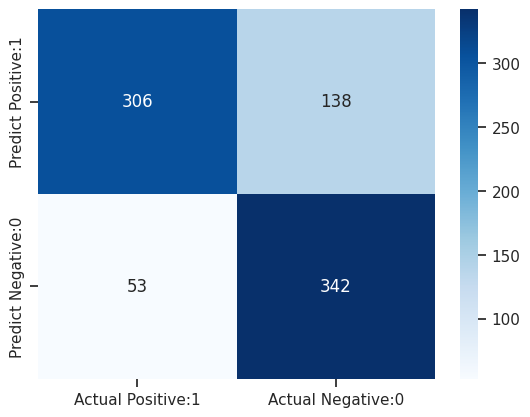

<Figure size 900x900 with 0 Axes>

In [478]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# **Visualización del árbol**

[Text(0.5, 0.875, 'x[49] <= 0.5\ngini = 0.5\nsamples = 1957\nvalue = [954, 1003]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.399\nsamples = 948\nvalue = [687, 261]'),
 Text(0.125, 0.375, 'x[32] <= 0.5\ngini = 0.467\nsamples = 634\nvalue = [399, 235]'),
 Text(0.0625, 0.125, 'gini = 0.455\nsamples = 240\nvalue = [84, 156]'),
 Text(0.1875, 0.125, 'gini = 0.321\nsamples = 394\nvalue = [315, 79]'),
 Text(0.375, 0.375, 'x[19] <= 234.5\ngini = 0.152\nsamples = 314\nvalue = [288, 26]'),
 Text(0.3125, 0.125, 'gini = 0.137\nsamples = 311\nvalue = [288, 23]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[34] <= 25.5\ngini = 0.389\nsamples = 1009\nvalue = [267, 742]'),
 Text(0.625, 0.375, 'x[41] <= 1.5\ngini = 0.489\nsamples = 410\nvalue = [175, 235]'),
 Text(0.5625, 0.125, 'gini = 0.422\nsamples = 66\nvalue = [46, 20]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 344\nvalue = [129, 215]'),
 Text(0.875, 0.375, 'x[4] <= 0.5\ngini = 0.26\nsamples = 599\n

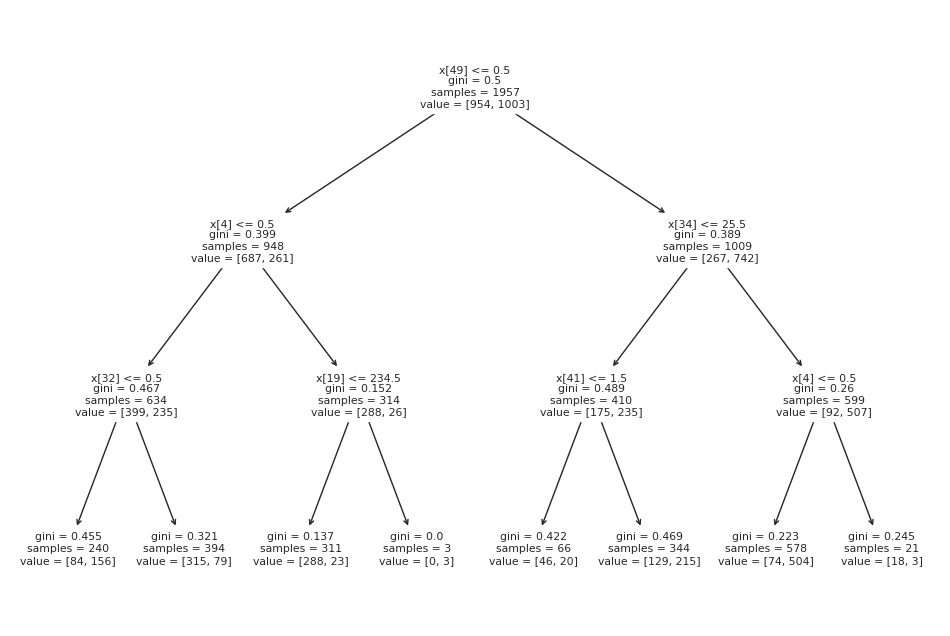

In [479]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Visualizar el árbol con graphviz**

In [480]:
#Instalar Graphviz en Python pip install graphviz 
import graphviz 
import pydotplus
%matplotlib inline

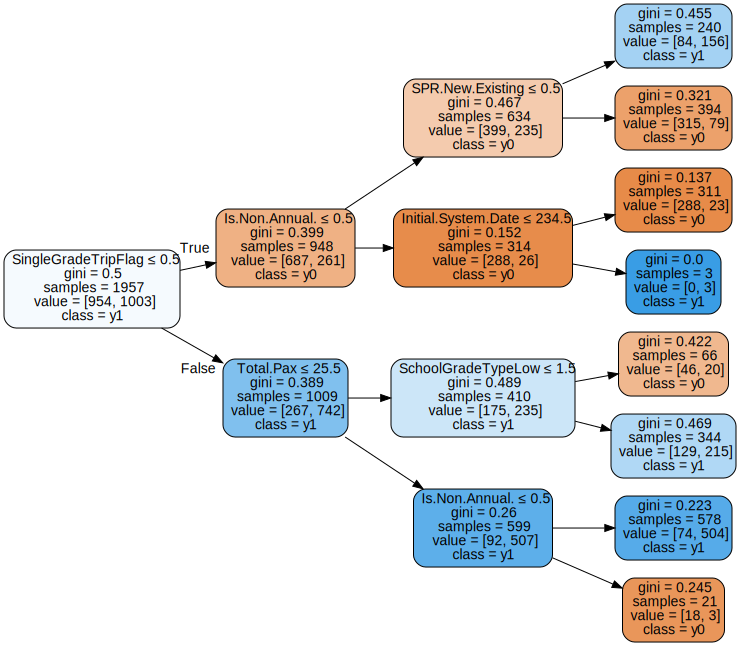

In [481]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

# **Instanciamos el modelo con criterio gini entropy**

In [482]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# **Predecir con test set para el criterio entropy**

In [483]:
y_pred_en = clf_en.predict(X_test)

In [484]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(clf_en.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(clf_en.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.79
Precisión en el set de Test: 0.77


#**Metricas de desempeño**
Accuracy score con criterio Entropy

In [485]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred_en, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_en, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_en, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_en, average='micro')))

F-1 Score :  0.7723480333730631
Precision Score :  0.7723480333730631
Recall Score :  0.7723480333730631
Jaccard Score :  0.629126213592233


In [486]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       444
           1       0.71      0.87      0.78       395

    accuracy                           0.77       839
   macro avg       0.78      0.78      0.77       839
weighted avg       0.79      0.77      0.77       839



<Figure size 900x900 with 0 Axes>

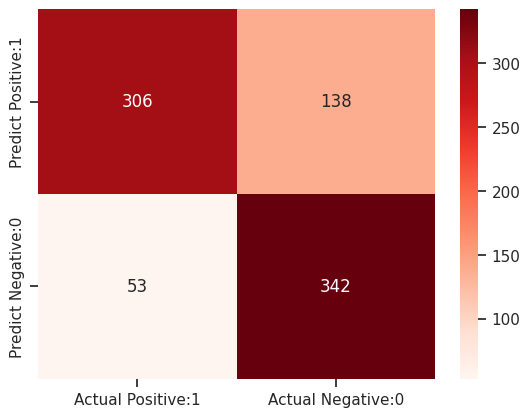

<Figure size 900x900 with 0 Axes>

In [487]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

[Text(0.5, 0.875, 'x[49] <= 0.5\nentropy = 1.0\nsamples = 1957\nvalue = [954, 1003]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\nentropy = 0.849\nsamples = 948\nvalue = [687, 261]'),
 Text(0.125, 0.375, 'x[32] <= 0.5\nentropy = 0.951\nsamples = 634\nvalue = [399, 235]'),
 Text(0.0625, 0.125, 'entropy = 0.934\nsamples = 240\nvalue = [84, 156]'),
 Text(0.1875, 0.125, 'entropy = 0.723\nsamples = 394\nvalue = [315, 79]'),
 Text(0.375, 0.375, 'x[14] <= 0.481\nentropy = 0.412\nsamples = 314\nvalue = [288, 26]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.508\nsamples = 231\nvalue = [205, 26]'),
 Text(0.75, 0.625, 'x[34] <= 25.5\nentropy = 0.834\nsamples = 1009\nvalue = [267, 742]'),
 Text(0.625, 0.375, 'x[41] <= 1.5\nentropy = 0.984\nsamples = 410\nvalue = [175, 235]'),
 Text(0.5625, 0.125, 'entropy = 0.885\nsamples = 66\nvalue = [46, 20]'),
 Text(0.6875, 0.125, 'entropy = 0.954\nsamples = 344\nvalue = [129, 215]'),
 Text(0.875, 0.375, 'x[4

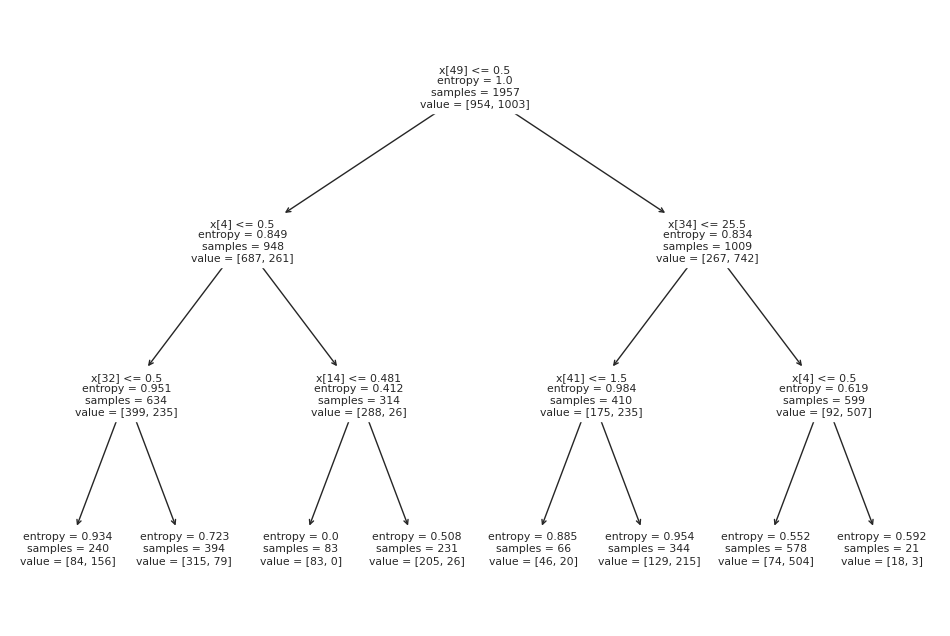

In [488]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

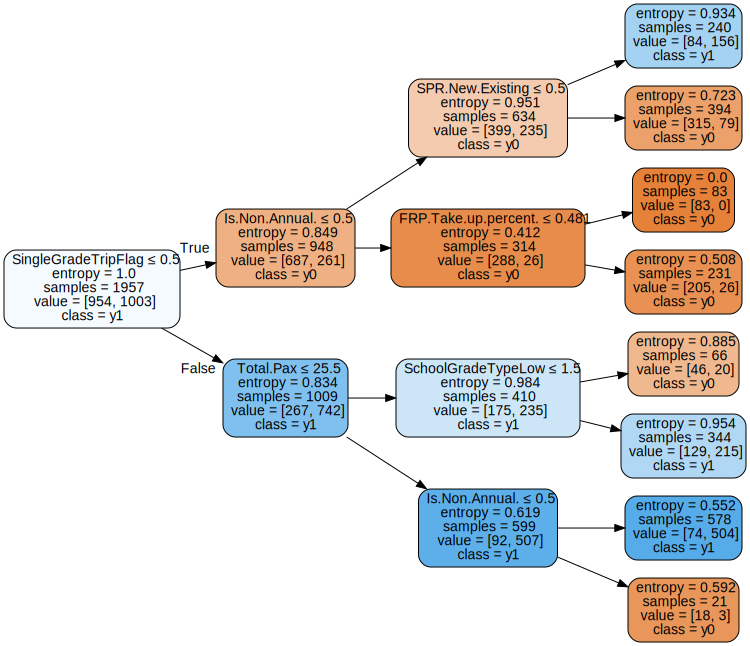

In [489]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,  
                                class_names=True,  
                                filled=True, rotate=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

# **El modelo funciona bien tanto con el criterio Gini como Entropy, pero predice mejor con Gini.**

# **Detectar importancia de las variables**:

---



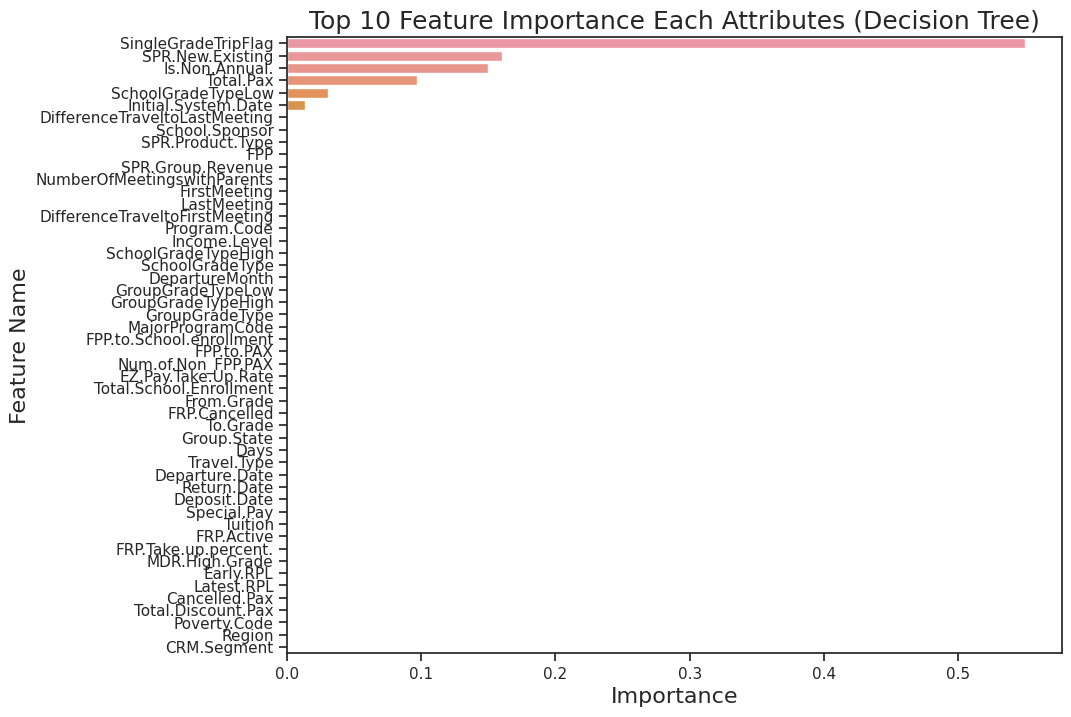

In [492]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": clf_gini.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(50)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [493]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.5 MB/s eta 0:00:00


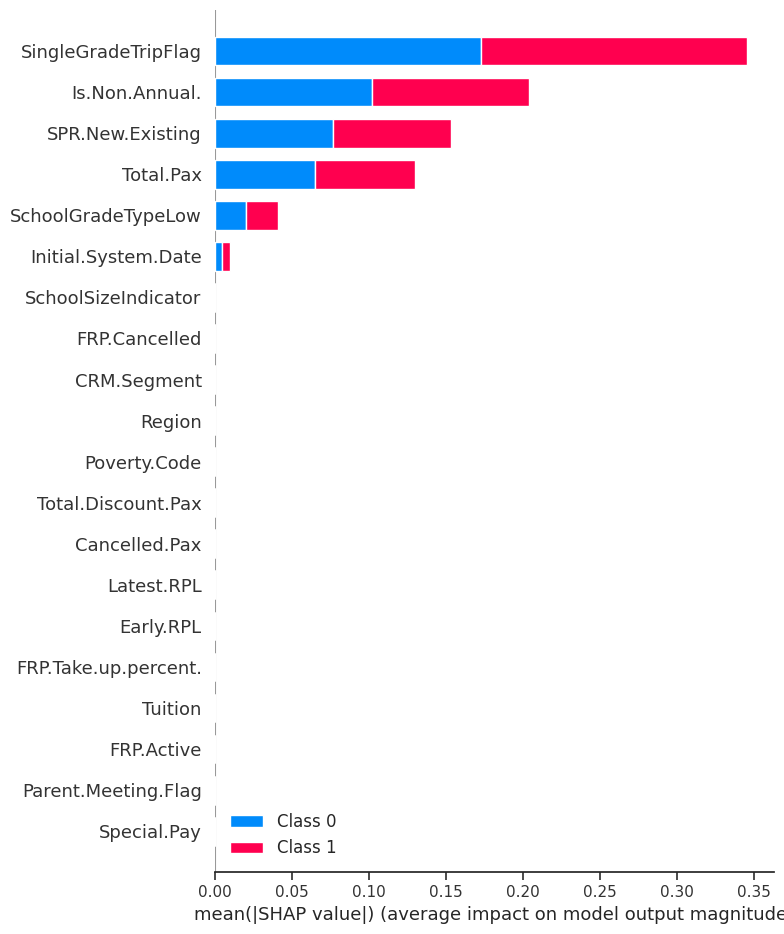

In [494]:
import shap
explainer = shap.TreeExplainer(clf_gini)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# **RANDOM FOREST**
# **Instanciar el modelo**

In [495]:
from sklearn.ensemble import RandomForestClassifier

In [496]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# **Función predicción Test set**

In [497]:
y_pred = rfc.predict(X_test)

In [498]:
#Verificamos precisión del modelo
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 1.00
Precisión en el set de Test: 0.87


# **Modelo Random Forest con n_estimators = 100**

In [499]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Se fija el modelo al training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [500]:
#Prediccoón con test set
y_pred_100 = rfc_100.predict(X_test)

In [501]:
#Verificamos precisión del modelo
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8677


# **Encontrar las características importantes para el modelo Random Forest**

In [502]:
# Se crea un clasificador con n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


# Se ajusta el modelo al training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [503]:
#Score más importantes de las características del modelo 
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Is.Non.Annual.                    0.078496
SingleGradeTripFlag               0.075082
SPR.New.Existing                  0.050549
Total.Pax                         0.044616
From.Grade                        0.033684
FRP.Active                        0.033210
Total.School.Enrollment           0.032420
FPP.to.School.enrollment          0.031479
Initial.System.Date               0.030858
FPP                               0.027431
Early.RPL                         0.026719
Latest.RPL                        0.024000
FRP.Take.up.percent.              0.023955
Return.Date                       0.023629
Departure.Date                    0.023145
FirstMeeting                      0.022666
SPR.Group.Revenue                 0.022175
Tuition                           0.022104
DifferenceTraveltoFirstMeeting    0.021993
LastMeeting                       0.021911
DifferenceTraveltoLastMeeting     0.021123
FPP.to.PAX                        0.021073
EZ.Pay.Take.Up.Rate               0.020862
Deposit.Dat

**La característica más importante es Is.Non.Annual., y las de menor importancia con diferencia son MajorProgramCode, Travel.Type, Parent.Meeting.flag**


# **Graficar las características**

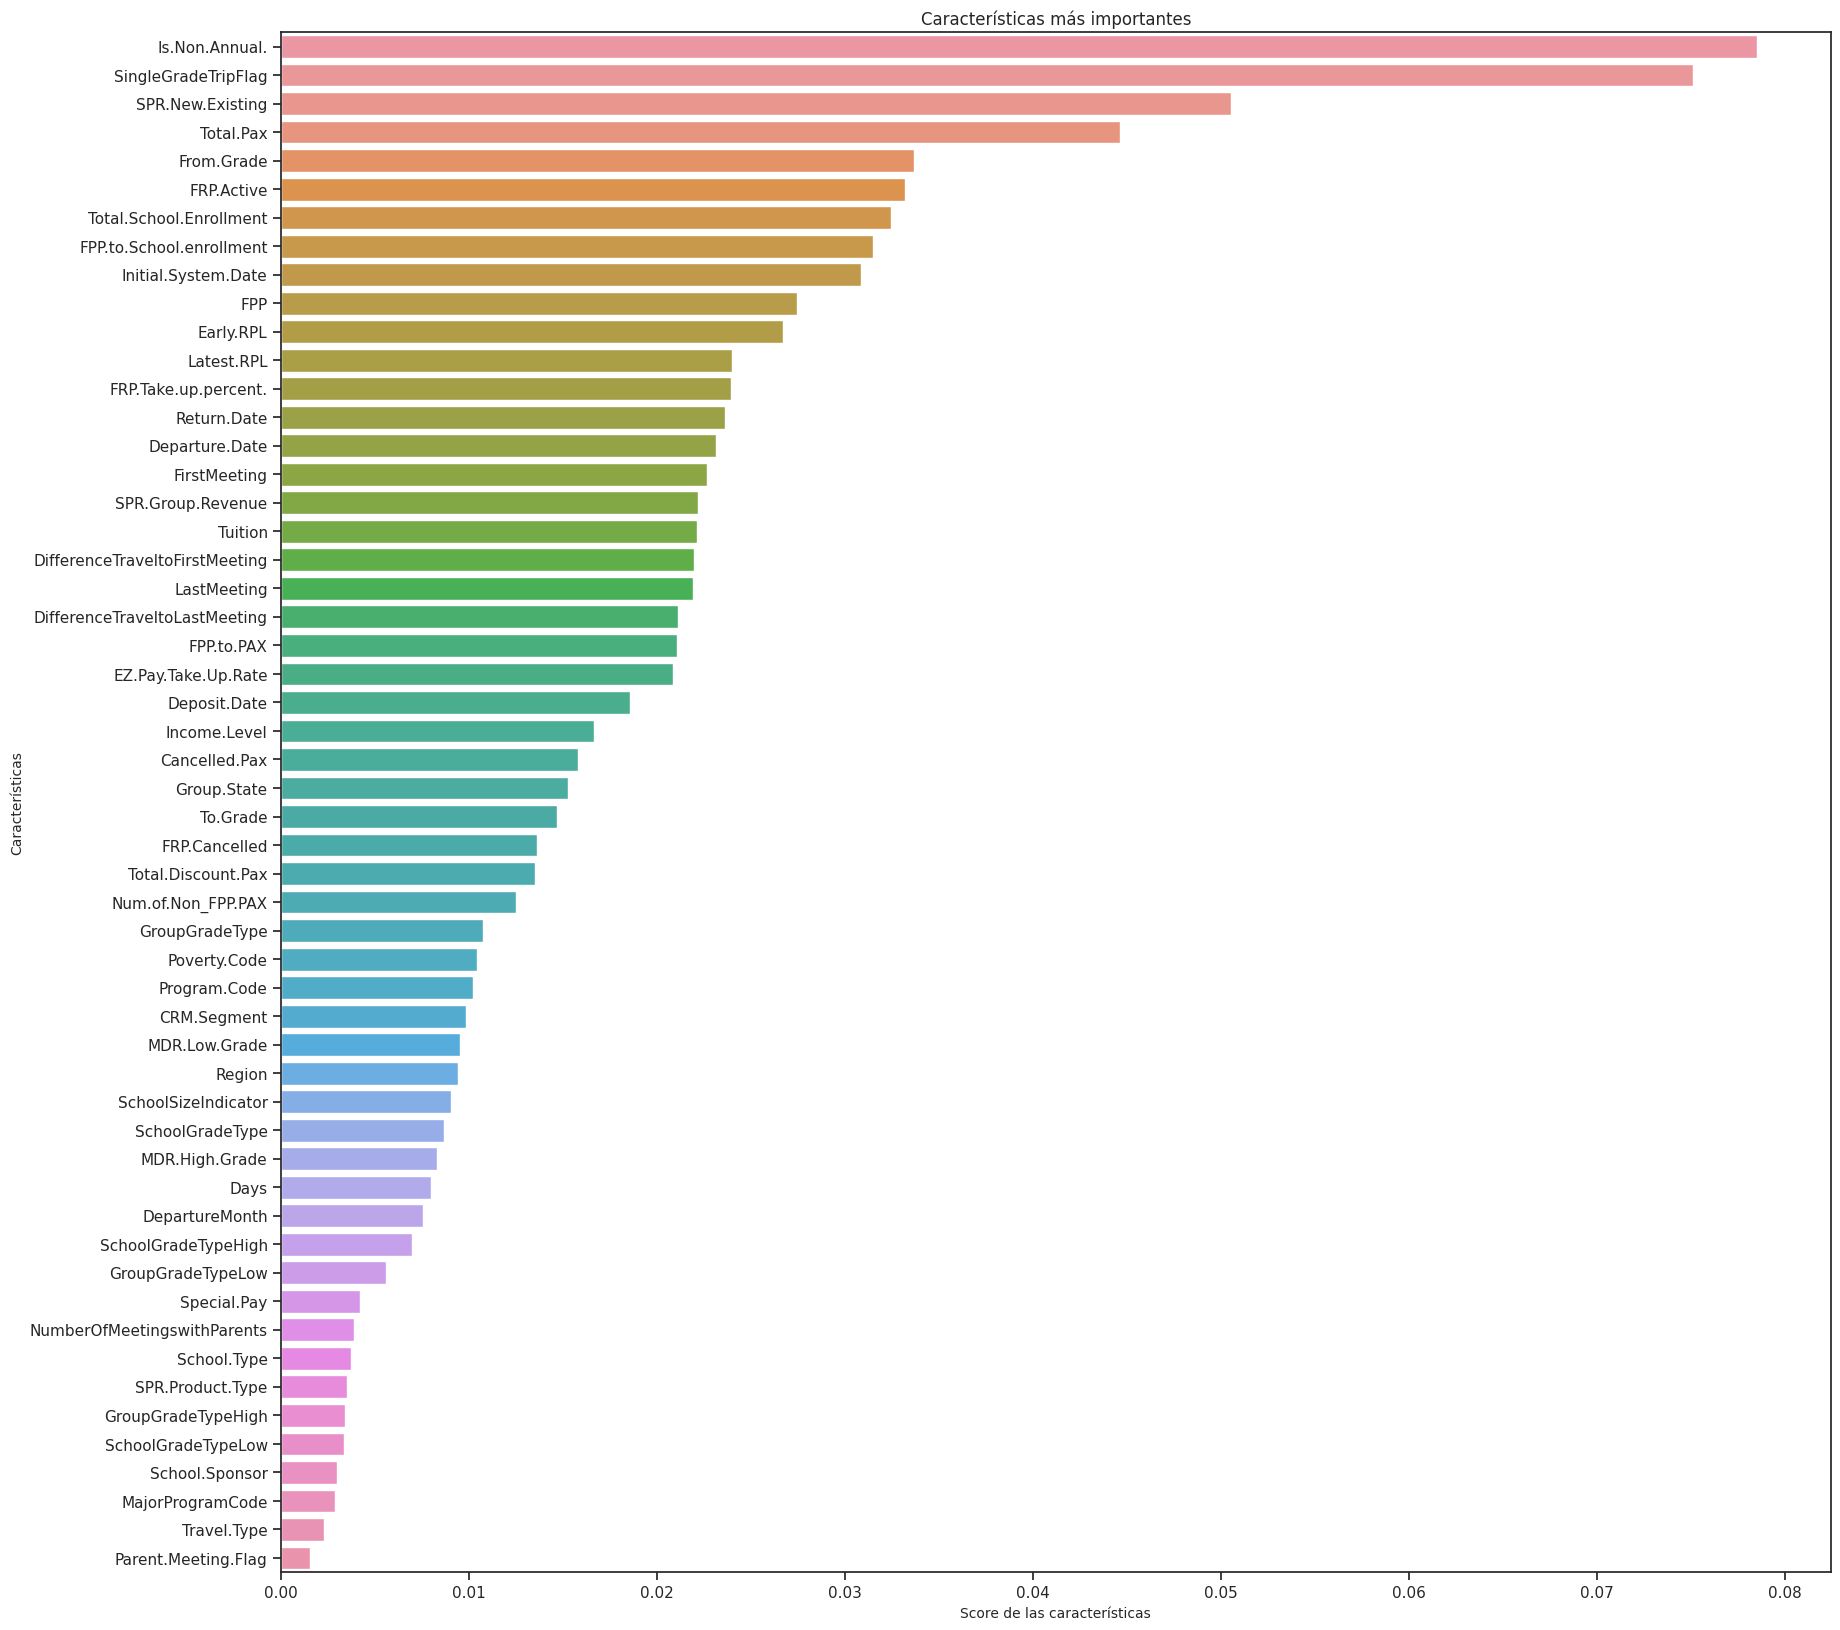

In [506]:
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la gráfica
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico 

plt.xlabel('Score de las características', fontsize=10)

plt.ylabel('Características', fontsize=10)

# Agregamos título al gráfico

plt.title("Características más importantes", fontsize=12)

plt.show()